#  Introduction
### This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Objectives
### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
### 
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# Import Libraries

In [342]:
# imporiting all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random


In [343]:
import warnings
warnings.filterwarnings('ignore')

# Read data set

In [4]:
# Read data from file 'application_data.csv' 
app= pd.read_csv("application_data.csv")


In [5]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
app.shape

(307511, 122)

In [6]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [38]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [39]:
# describe the data
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# handling null columns

In [40]:
# finding null values
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [41]:
# check the null columns with null percentage 
pd.set_option("display.max_rows",122)
null_per =((app.isnull().sum()/len(app))*100).sort_values(ascending = False)
null_per

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [42]:
len(emptycol)

49

In [44]:
# columns having null values more then 35%
emptycol

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [45]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Missing Values

In [47]:
# check the values of  OCCUPATION_TYPE
app. OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [48]:
app. OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

#### we can impute the missing values with the 'mode' since the occupation type is laborers(object type)

In [49]:
# for AMT_REQ_CREDIT_BUREAU_YEAR
app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [50]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [51]:
# for AMT_REQ_CREDIT_BUREAU_MON
app.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [52]:
#for AMT_REQ_CREDIT_BUREAU_WEEK
app.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [53]:
# for AMT_REQ_CREDIT_BUREAU_DAY
app.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [54]:
# for AMT_REQ_CREDIT_BUREAU_HOUR
app.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [55]:
# for AMT_REQ_CREDIT_BUREAU_QRT
app.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#####  For the above mentioned columns that imputed the missing values with mode which value comes '0', so replacing missing values with the most frequent value would make more sense.


In [56]:
# value of AMT_GOODS_PRICE
app.AMT_GOODS_PRICE.value_counts()

AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: count, Length: 1002, dtype: int64

In [58]:
app.AMT_GOODS_PRICE.median()

450000.0

In [59]:
# value of AMT_ANNUITY 
app.AMT_ANNUITY .value_counts()

AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13672, dtype: int64

In [60]:
app.AMT_ANNUITY.median()

24903.0

# checking Errors in Dtypes

#### In the cells shown below we have Changed the 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' which had negative or mixed values and imputed them with absolute values for our analysis.

In [62]:
# Checking the values present in columns starting with 'DAYS'
print(app['DAYS_BIRTH'].unique())
print(app['DAYS_EMPLOYED'].unique())
print(app['DAYS_REGISTRATION'].unique())
print(app['DAYS_ID_PUBLISH'].unique())
print(app['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [63]:
# columns starts with 'DAYS' by filter_col as df
filter_col = [col for col in app if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [66]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
app[filter_col]= abs(app[filter_col])

In [67]:
print(app['DAYS_BIRTH'].unique())
print(app['DAYS_EMPLOYED'].unique())
print(app['DAYS_REGISTRATION'].unique())
print(app['DAYS_ID_PUBLISH'].unique())
print(app['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [68]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean         4986.120328      2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min             0.000000         0.000000       0.000000       0.000000   
25%          2010.000000      1720.000000       5.000000       1.000000   
50%          4504.000000      3254.000000       9.000000       1.000000   
75%          7479.500000      4299.000000      15.000000       1.000000   
max         24672.000000      7197.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [72]:
app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [73]:
app.shape

(307511, 122)

In [75]:
# check CODE_GENDER
app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

##### imputing the 'XNA'value, which is not available for the columns 'CODE_GENDER'


In [77]:
# Replacing XNA value with F
app.loc[app.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [78]:
# check ORGANIZATION_TYPE
app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

##### Imputing the value'XNA' to np.NaN which means not available for the column 'ORGANIZATION_TYPE'


In [79]:
app = app.replace('XNA',np.NaN)

In [80]:
app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [81]:
app.ORGANIZATION_TYPE.isnull().sum()

55374

### Binning of continuous variables

In [84]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app['AMT_INCOME_RANGE'] = pd.qcut(app.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app['AMT_INCOME_RANGE'].head(10)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [86]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
app['AMT_CREDIT_RANGE'] = pd.qcut(app.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app['AMT_CREDIT_RANGE'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [87]:
#  converting 'DAYS_BIRTH' to year
app['DAYS_BIRTH']=(app['DAYS_BIRTH']/365).astype(int)
app['DAYS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

In [88]:
app['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [92]:
# Biining 'DAYS_BIRTH'
app['DAYS_BIRTH_BINS']=pd.cut(app['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
app['DAYS_BIRTH_BINS'].head()

0    Very_Young
1    Middle_Age
2    Middle_Age
3    Middle_Age
4    Middle_Age
Name: DAYS_BIRTH_BINS, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

In [93]:
app['DAYS_BIRTH_BINS'].value_counts()

DAYS_BIRTH_BINS
Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: count, dtype: int64

# ANALYSIS

### OUTLIERS

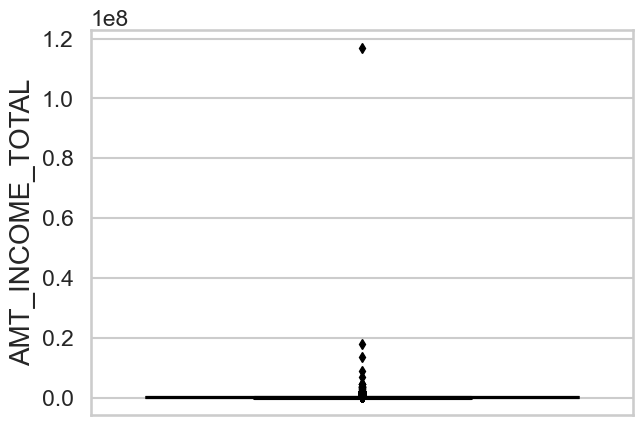

In [347]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
plt.figure(figsize=[7,5])
sns.boxplot(data=app,y="AMT_INCOME_TOTAL",color='black')
plt.show();

#### Here, in the coloumn 'AMT_INCOME_TOTAL' which tells us the income of the client.

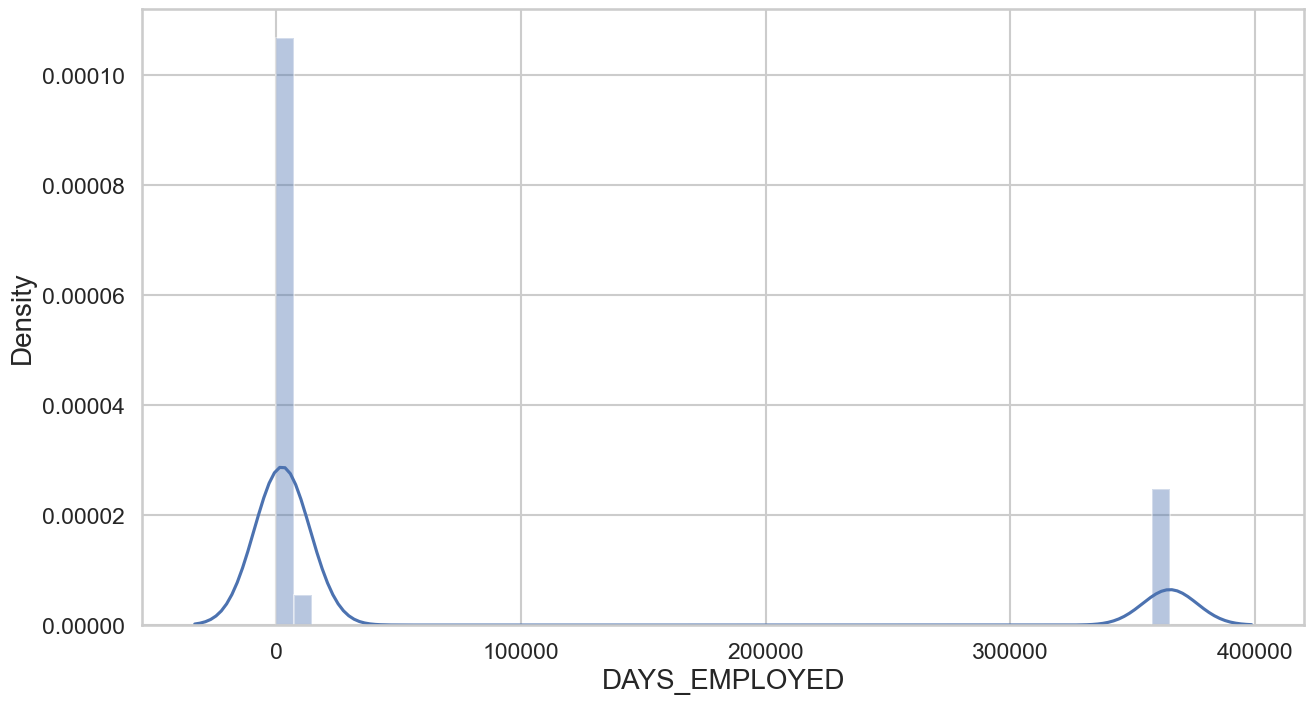

In [348]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize = [15,8])
sns.distplot(app['DAYS_EMPLOYED'])
plt.show();

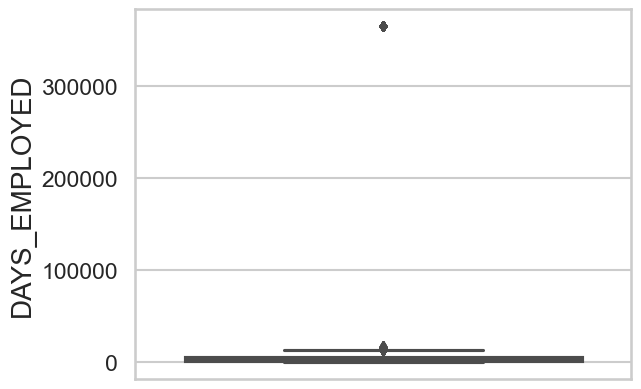

In [349]:
# boxplot of 'DAYS_EMPLOYED'
sns.boxplot(y=app['DAYS_EMPLOYED'])
plt.show();

####  in the coloumn 'DAYS_EMPLOYED' which tells how many days before the application the person started current employment. We observe a value which is greater that 20,000 which is surely an outlier because 25,000/365 will be around 54 years. Considering that a person started working at age of 21, the person will be 21+54 will turn out to be 75 years old.


In [100]:
# deriving variables 'years employed' from days employed
app['YEARS_EMPLOYED']=(app['DAYS_EMPLOYED']/-365)

# update df
defaulters=app[app.TARGET==1]
nondefaulter=app[app.TARGET==0]


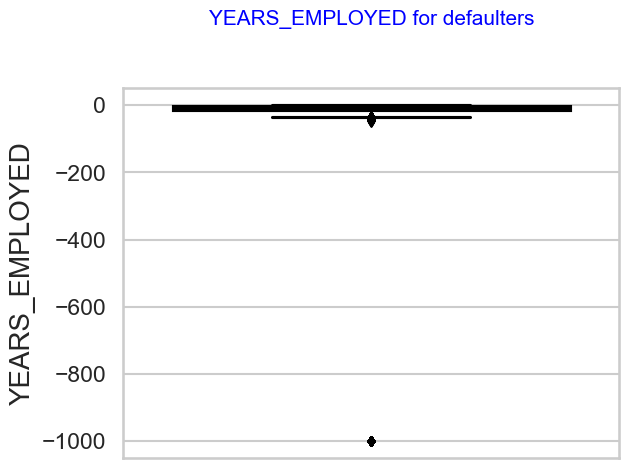

In [350]:
plt.title("YEARS_EMPLOYED for defaulters\n",fontsize = 15,color = "blue")
sns.boxplot(data = app,y= "YEARS_EMPLOYED",color ="black" )
plt.xticks(rotation=180)
plt.show();

####  large number of entries have 0 which means, a lot of people don't work.

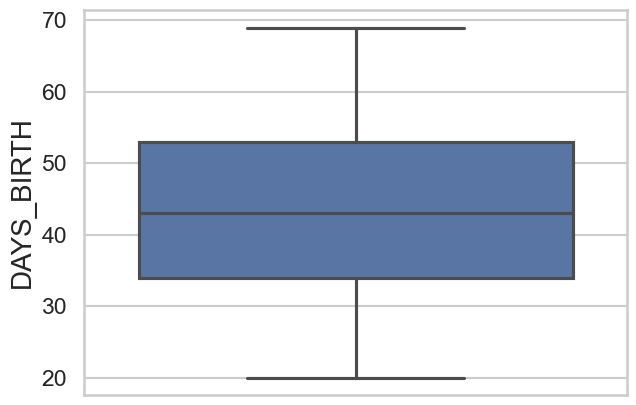

In [351]:
# check  "DAYS_BIRTH"
plt.figure(figsize=[7,5])
sns.boxplot(data=app,y= "DAYS_BIRTH")
plt.show();

#### no outliers present in this column.

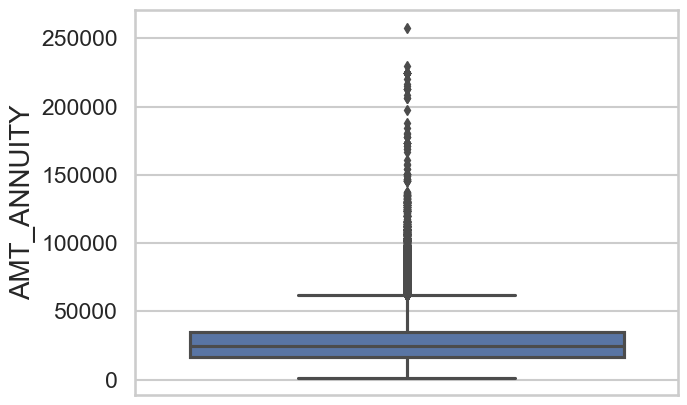

In [352]:
# check  "AMT_ANNUITY"
plt.figure(figsize=[7,5])
sns.boxplot(data=app,y= "AMT_ANNUITY")
plt.show();

#### in the coloumn 'AMT_AANNUITY' which tells the loan annuity. We observe a value which is greater that ~250000 which is surely an outlier.


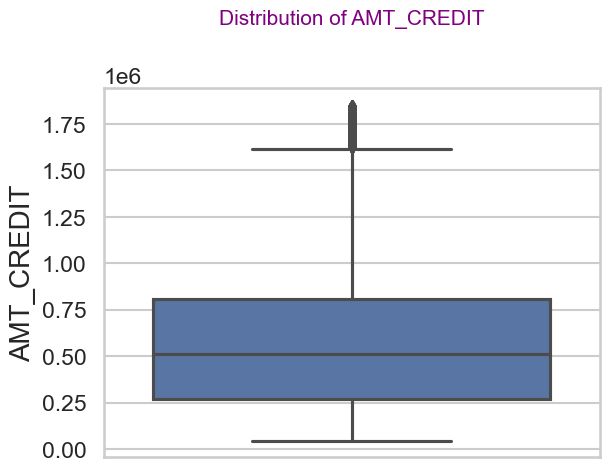

In [353]:
# removing all entries above 99 percentile
add=app[app.AMT_CREDIT<np.nanpercentile(app['AMT_CREDIT'],99)]

# update df
defaulters=app[app.TARGET==1]
nondefaulter=app[app.TARGET==0]
plt.title("Distribution of AMT_CREDIT\n",fontsize = 15,color = "purple")
sns.boxplot(data = add,y= "AMT_CREDIT" )
plt.show();

####  the credit amount lies between 250000 to around 500000 for defaulters

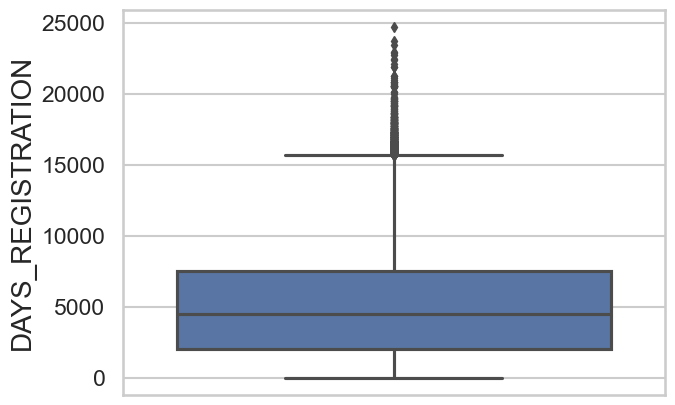

In [354]:
# check "DAYS_REGISTRATION"
plt.figure(figsize=[7,5])
sns.boxplot(data=app,y="DAYS_REGISTRATION")
plt.show();

#### The 'DAYS_REGISTRATION' column shows the number of days before the application when the client changed their registration. There's an exceptionally high value of over 24,000 days, indicating an outlier.

# Distribution

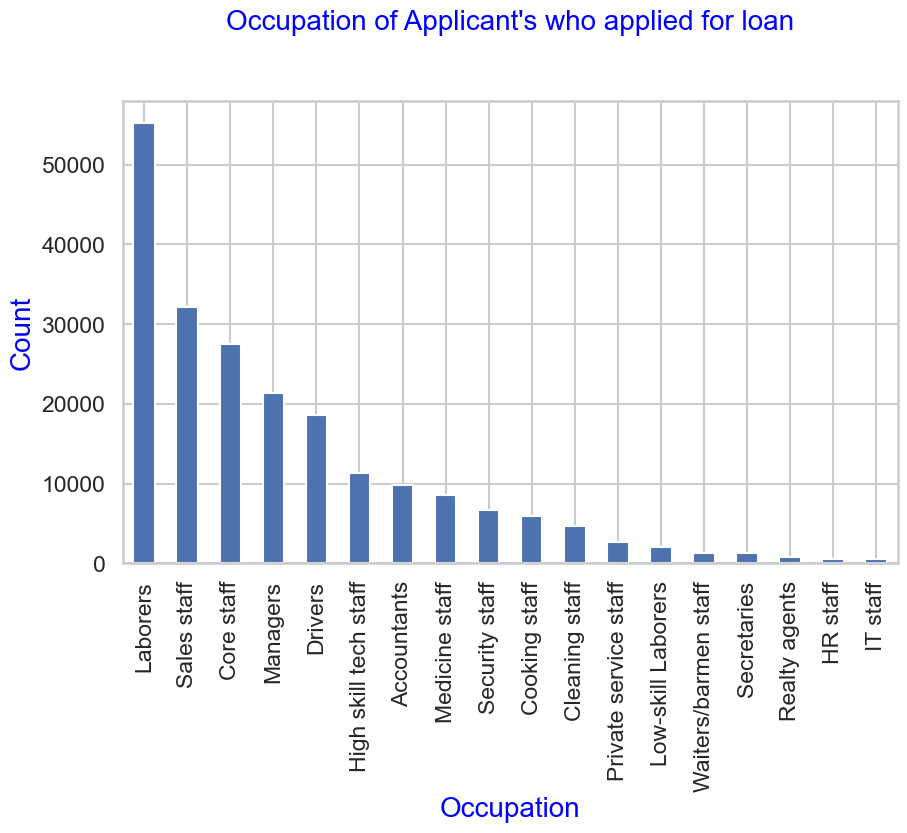

In [355]:
# check 'OCCUPATION_TYPE'
plt.figure(figsize=[10,6])
app['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.title("Occupation of Applicant\'s who applied for loan\n",fontsize = 20,color = "blue")
plt.xlabel("Occupation",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show();

####  Most of the individuals are Labourers, Sales Staff, or Core Staff, while IT Staff are relatively few.


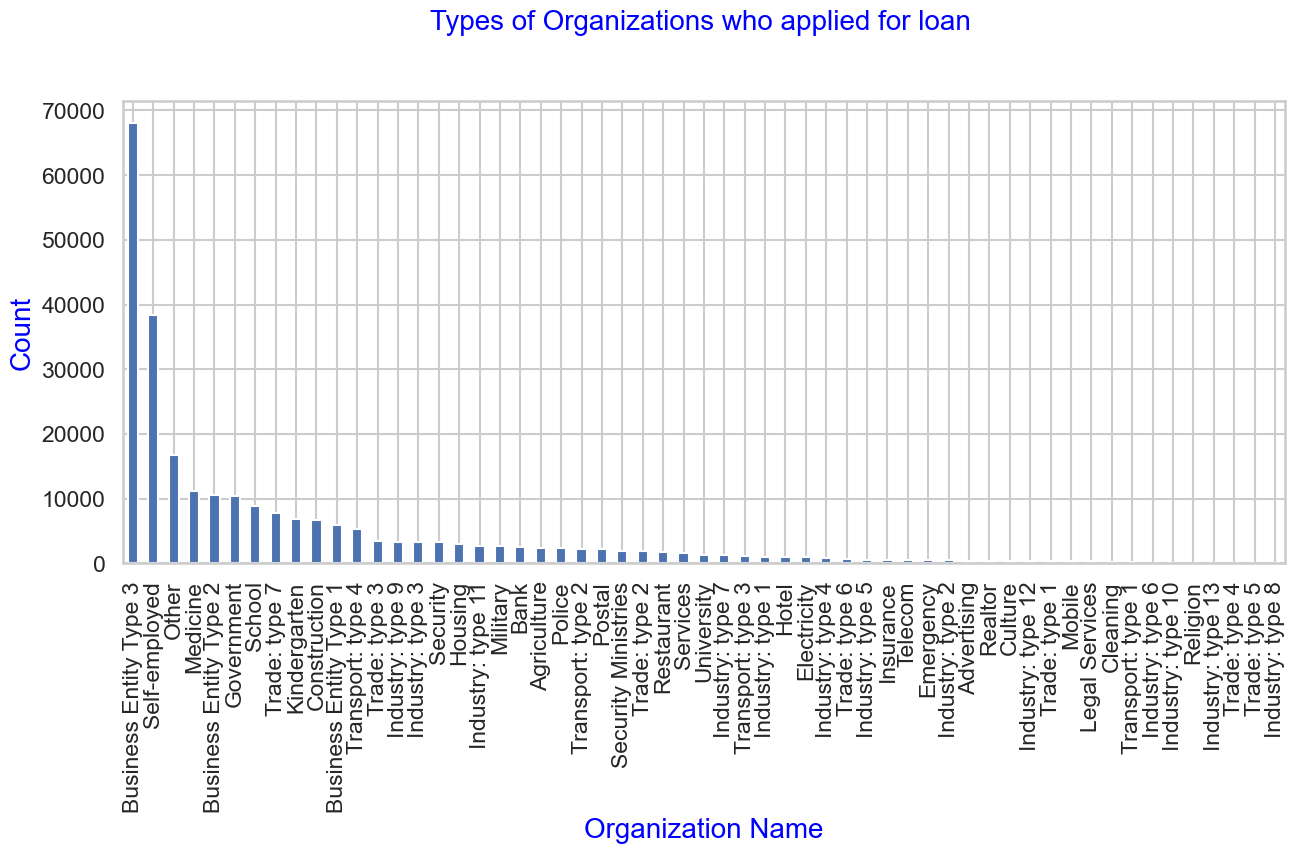

In [356]:
# Distribution of 'ORGANIZATION_TYPE'
plt.figure(figsize = [15,6])
app["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Types of Organizations who applied for loan \n",fontsize = 20,color = "blue")
plt.xlabel("Organization Name",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show();

#### Most loan applications are submitted by Business Entity Type 3 organizations.


# Imbalance Percentage

In [123]:
# calculating Imbalance Percentage
100*(app.TARGET.value_counts())/(len(app))

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

In [124]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target_1 = app[app['TARGET']==1]
target_0 = app[app['TARGET']==0]

In [125]:
target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   
5                    0.035792          46           1588             4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   
5              477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                  

In [126]:
target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801          25            637             3648.0   
26                    0.018029          51           2628             6573.0   
40                    0.025164          47           1262             1182.0   
42                    0.007305          36           3597               45.0   
81                    0.028663          67         365243             5391.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120          NaN           1               1                0   
26             1827          NaN           1               1                0   
40             1029          NaN           1               1                0   
42             4409          NaN           1               1                1   
81             4199          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2

# Univariate Analysis for target =0 and target=1

## Categorical Variables

### Gender Distribution


In [145]:
# gender distribution of loan non-payment difficulties
target_0['CODE_GENDER'].value_counts(normalize=True)*100

CODE_GENDER
F    66.604643
M    33.395357
Name: proportion, dtype: float64

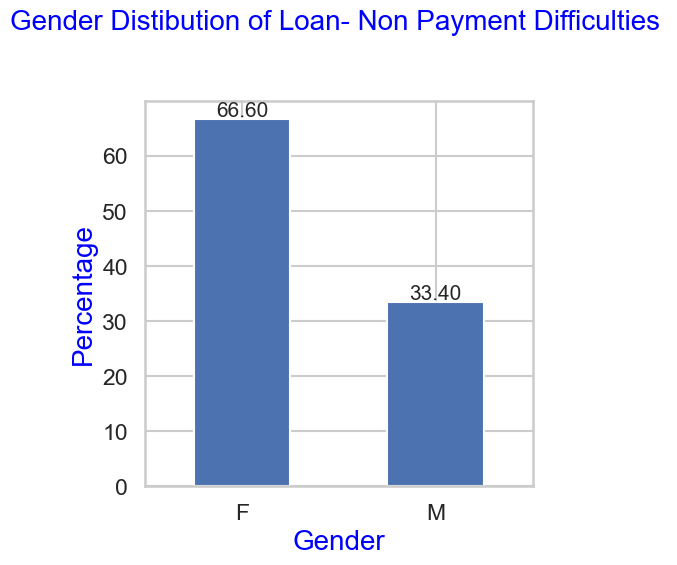

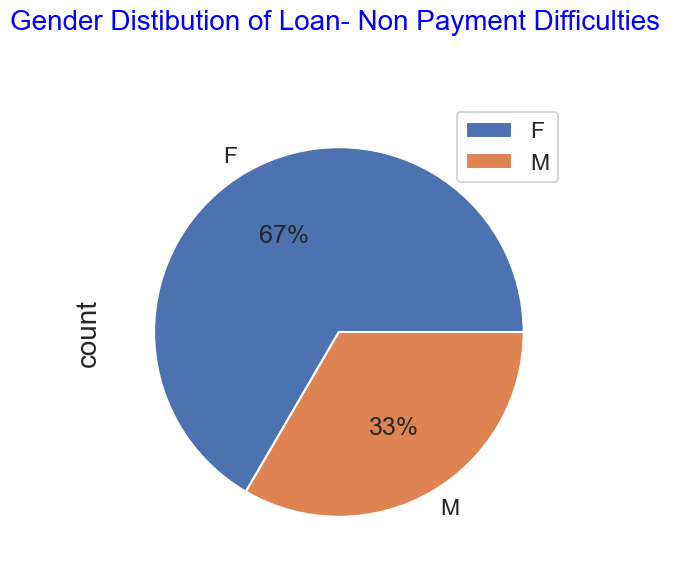

In [357]:
plt.figure(figsize = [5,5])
plots = (target_0["CODE_GENDER"].value_counts(normalize = True)*100).plot.bar()
plt.title("Gender Distibution of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xticks(rotation =0)
plt.xlabel("Gender",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})

#plot 2
plt.figure(figsize=[12,6])
target_0["CODE_GENDER"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Gender Distibution of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend()
plt.show();

In [155]:
# Gender Distibution of Loan Payment Difficulties
target_1["CODE_GENDER"].value_counts(normalize =True)*100

CODE_GENDER
F    57.079557
M    42.920443
Name: proportion, dtype: float64

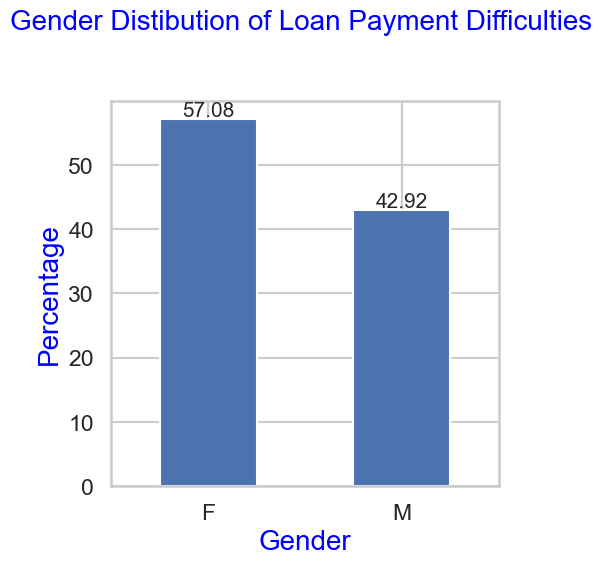

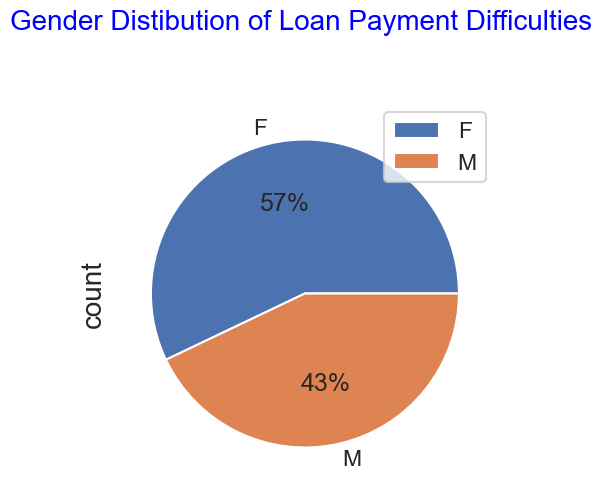

In [358]:
plt.figure(figsize = [5,5])
plots =(target_1["CODE_GENDER"].value_counts(normalize = True)*100).plot.bar()
plt.title("Gender Distibution of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Gender",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})

# plot 2
plt.figure(figsize = [5,5])
target_1["CODE_GENDER"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Gender Distibution of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend()
plt.show();

#### When comparing cases of payment difficulties and non-payment difficulties based on gender, it is evident that females constitute the majority in both scenarios. However, there is a noticeable increase in the percentage of males facing payment difficulties compared to those facing non-payment difficulties.

# Income Source

In [162]:
# Income sources of Loan- Non Payment Difficulties
target_0["NAME_INCOME_TYPE"].value_counts(normalize = True)*100


NAME_INCOME_TYPE
Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: proportion, dtype: float64

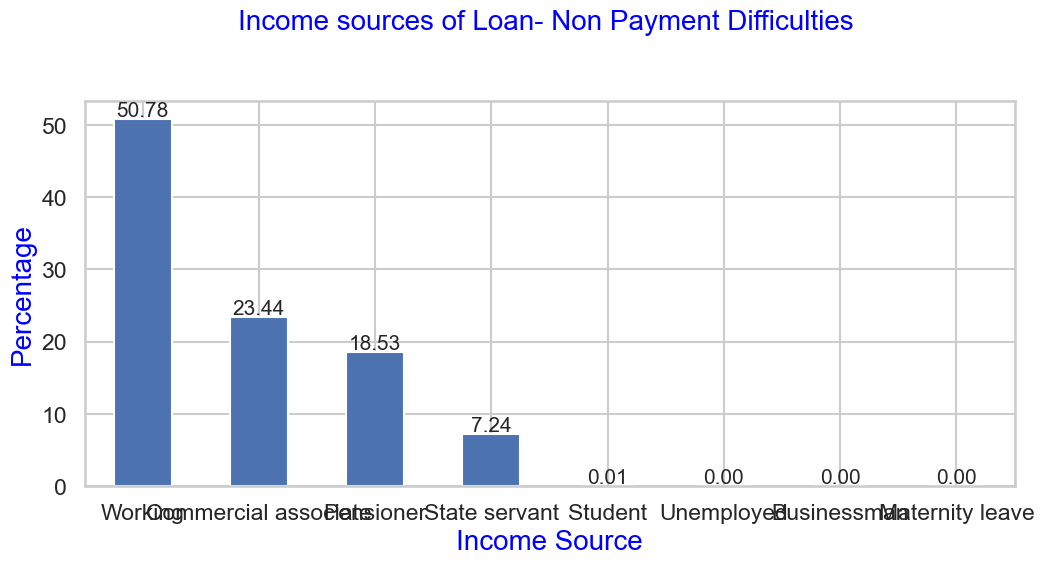

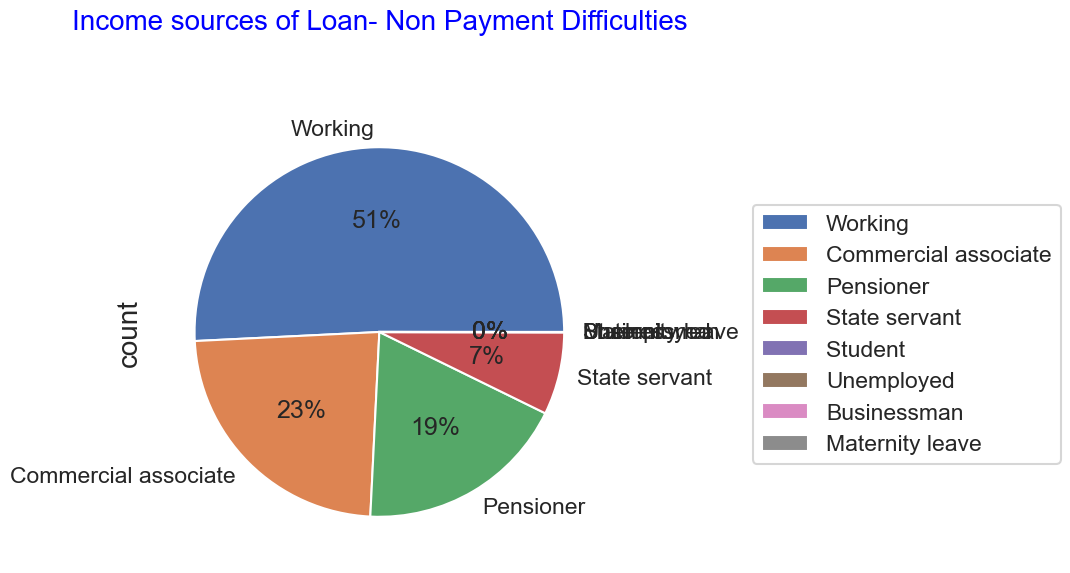

In [359]:
plt.figure(figsize = [12,5])
plots = (target_0["NAME_INCOME_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Income sources of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xlabel("Income Source",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})


#plot2
plt.figure(figsize = [23,6])
target_0["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income sources of Loan- Non Payment Difficulties\n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show();

In [166]:
# Income sources of Loan Payment Difficulties
target_1["NAME_INCOME_TYPE"].value_counts(normalize = True)*100

NAME_INCOME_TYPE
Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: proportion, dtype: float64

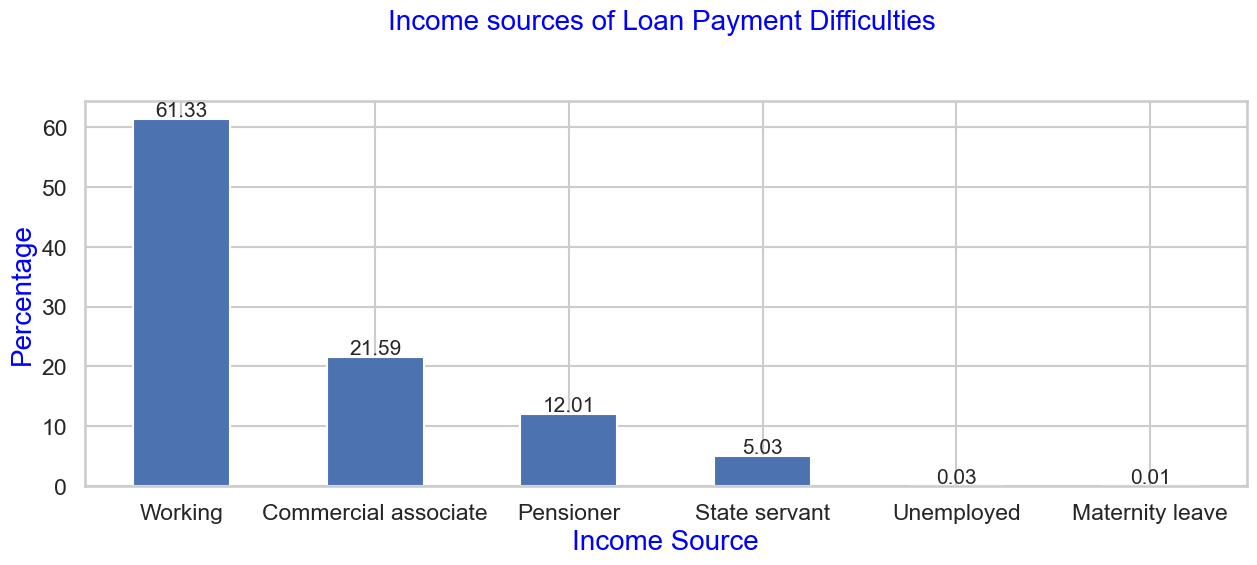

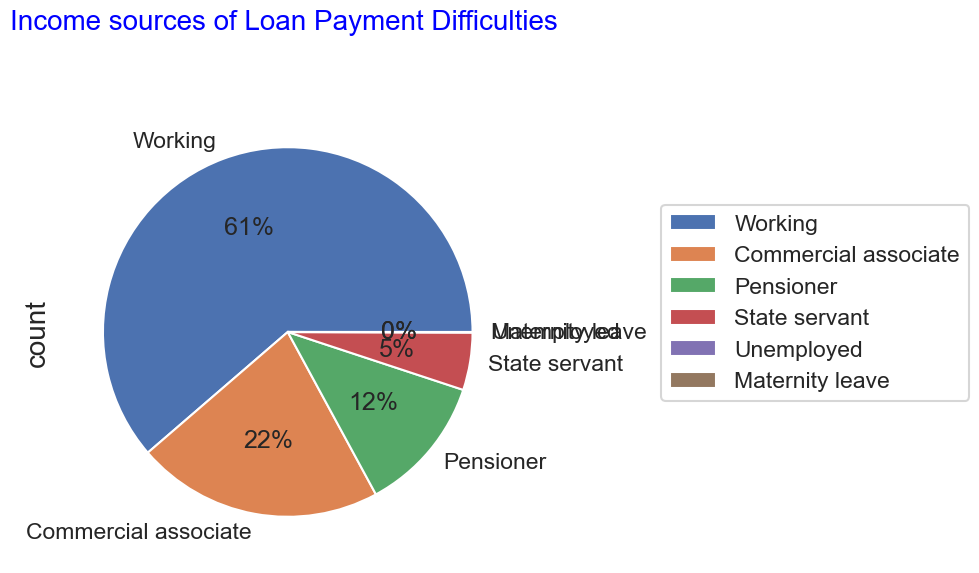

In [360]:
plt.figure(figsize = [15,5])
plots = (target_1["NAME_INCOME_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Income sources of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Income Source",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})

# plot2  
plt.figure(figsize = [15,6])
target_1["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income sources of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show();

### We see fewer retired people facing payment difficulties and more working individuals facing these challenges compared to both groups of people with and without payment issues.

## Income Range

In [168]:
# Income range of Loan-Non Payment Difficulties
target_0["AMT_INCOME_RANGE"].value_counts(normalize = True)*100

AMT_INCOME_RANGE
MEDIUM       34.617915
LOW          29.125602
VERY_LOW     20.675237
HIGH         10.905032
VERY_HIGH     4.676213
Name: proportion, dtype: float64

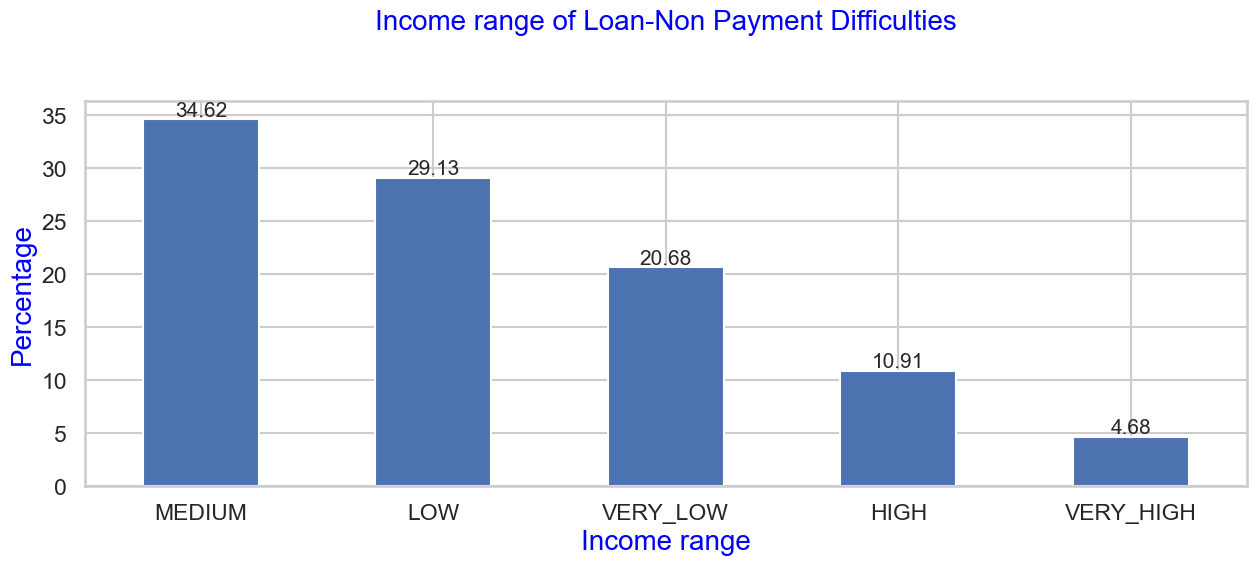

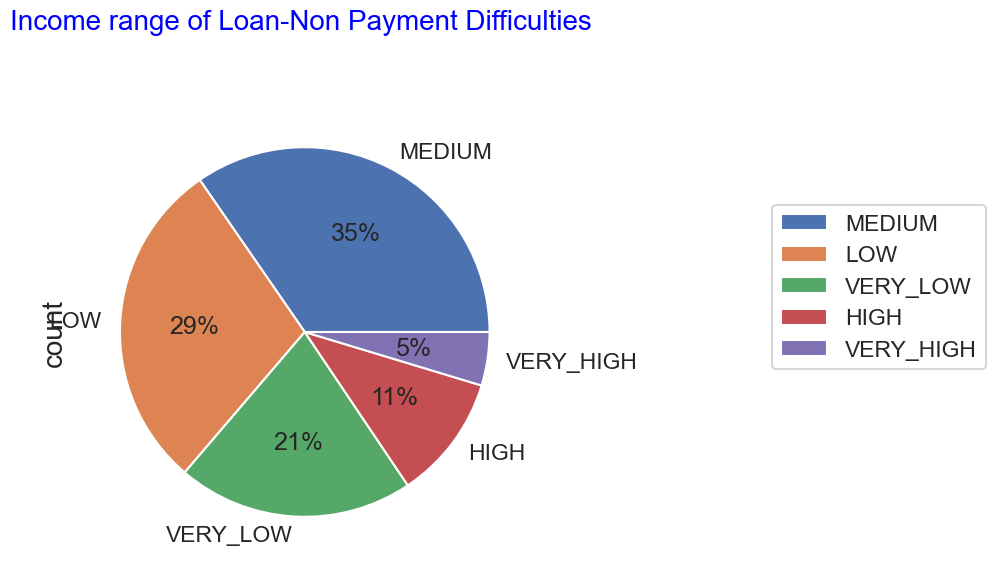

In [361]:
plt.figure(figsize = [15,5])
plots = (target_0["AMT_INCOME_RANGE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Income range of Loan-Non Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Income range",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})



# plot 2
plt.figure(figsize = [15,6])
target_0["AMT_INCOME_RANGE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income range of Loan-Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show();

In [170]:
# Income range of Loan Payment Difficulties
target_1["AMT_INCOME_RANGE"].value_counts(normalize = True)*100

AMT_INCOME_RANGE
MEDIUM       35.339376
LOW          31.238671
VERY_LOW     21.047331
HIGH          9.087613
VERY_HIGH     3.287009
Name: proportion, dtype: float64

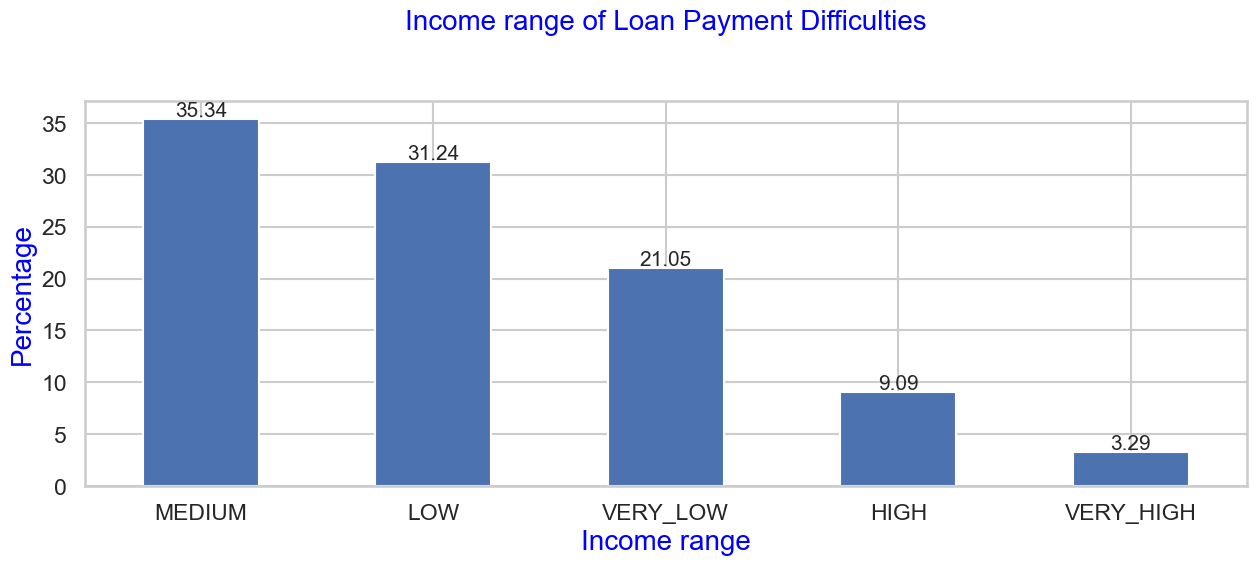

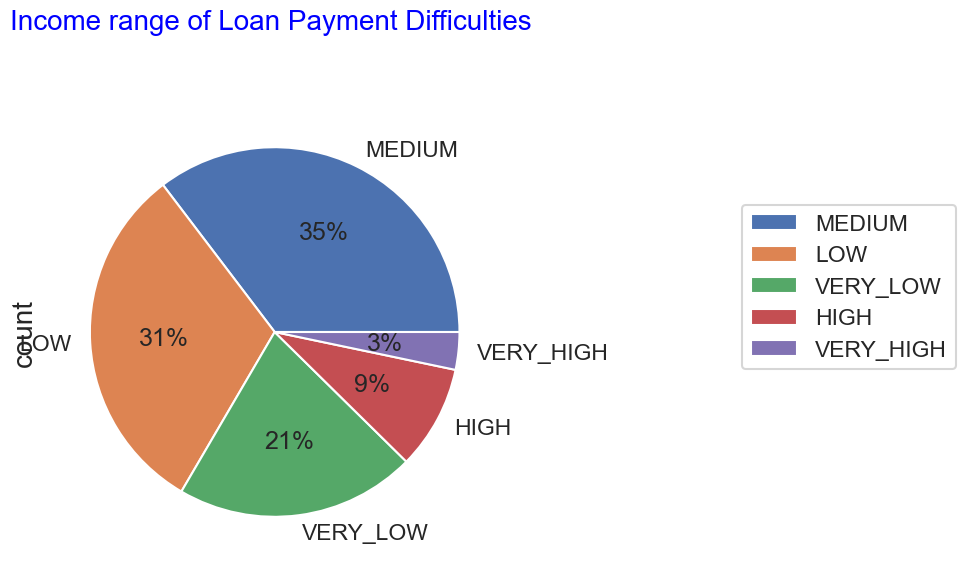

In [362]:
plt.figure(figsize = [15,5])
plots = (target_1["AMT_INCOME_RANGE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Income range of Loan Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Income range",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})


# plot 2
plt.figure(figsize = [15,6])
target_1["AMT_INCOME_RANGE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income range of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show();

#### We notice that a higher percentage of individuals facing loan payment difficulties have low incomes compared to those who do not face payment issues or have no difficulties with loan payments

# Accompanyed By

In [173]:
# Loan-Non Payment Difficulties are Accompanied by
target_0["NAME_TYPE_SUITE"].value_counts(normalize =True)*100

NAME_TYPE_SUITE
Unaccompanied      81.072180
Family             13.195293
Spouse, partner     3.721613
Children            1.075093
Other_B             0.567035
Other_A             0.280675
Group of people     0.088111
Name: proportion, dtype: float64

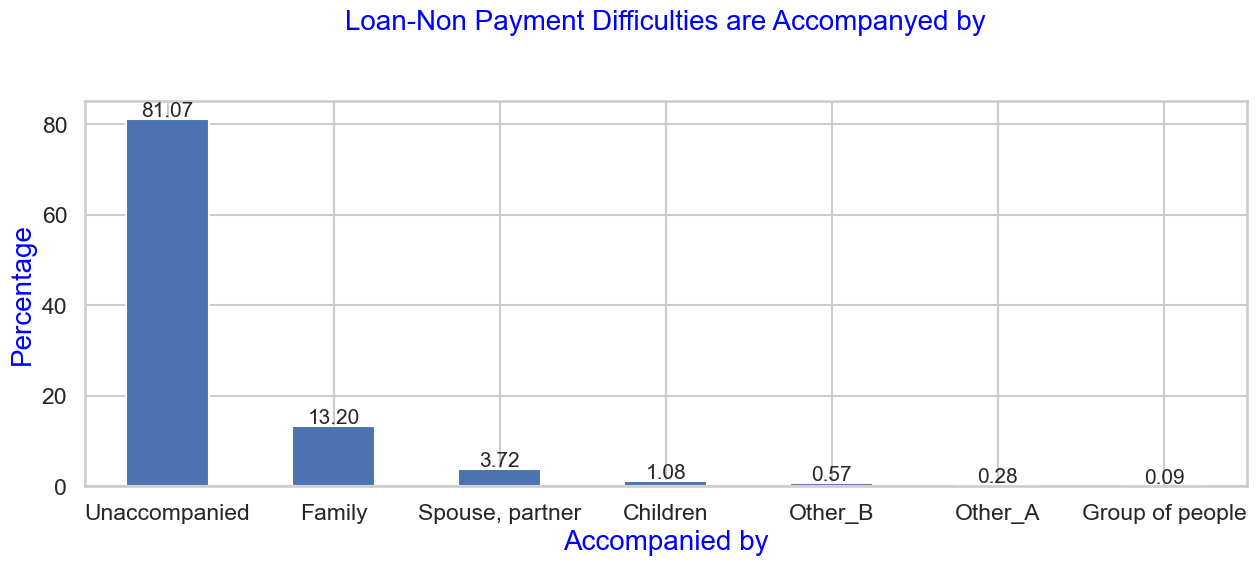

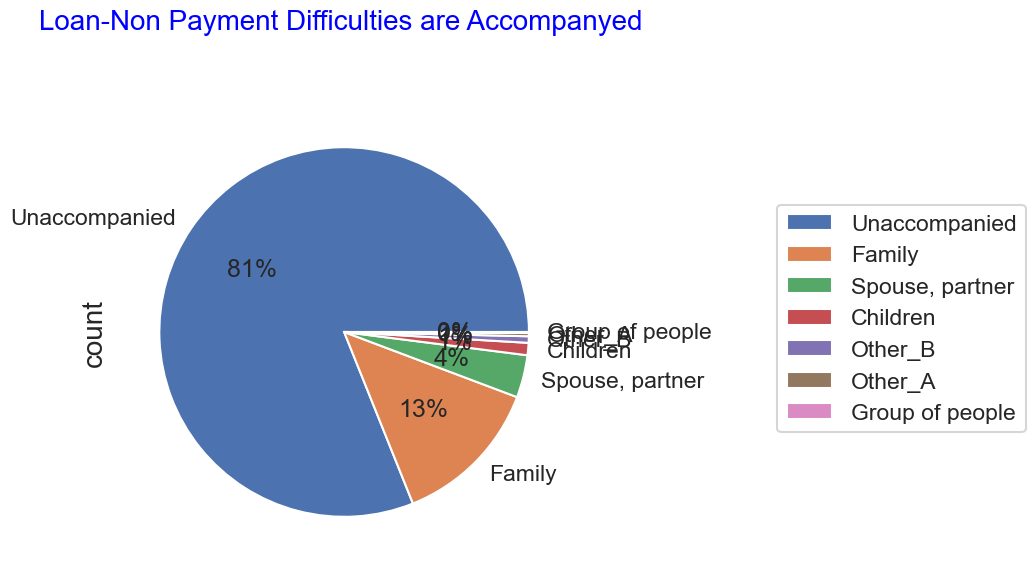

In [363]:
plt.figure(figsize = [15,5])
plots = (target_0["NAME_TYPE_SUITE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Loan-Non Payment Difficulties are Accompanyed by\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Accompanied by",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)

# plot 2
plt.figure(figsize = [15,6])
target_0["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Loan-Non Payment Difficulties are Accompanyed \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show();

In [184]:
# Loan-Non Payment Difficulties are Accompanied by
target_1["NAME_TYPE_SUITE"].value_counts(normalize =True)*100

NAME_TYPE_SUITE
Unaccompanied      82.153100
Family             12.155120
Spouse, partner     3.615431
Children            0.973541
Other_B             0.702888
Other_A             0.307009
Group of people     0.092911
Name: proportion, dtype: float64

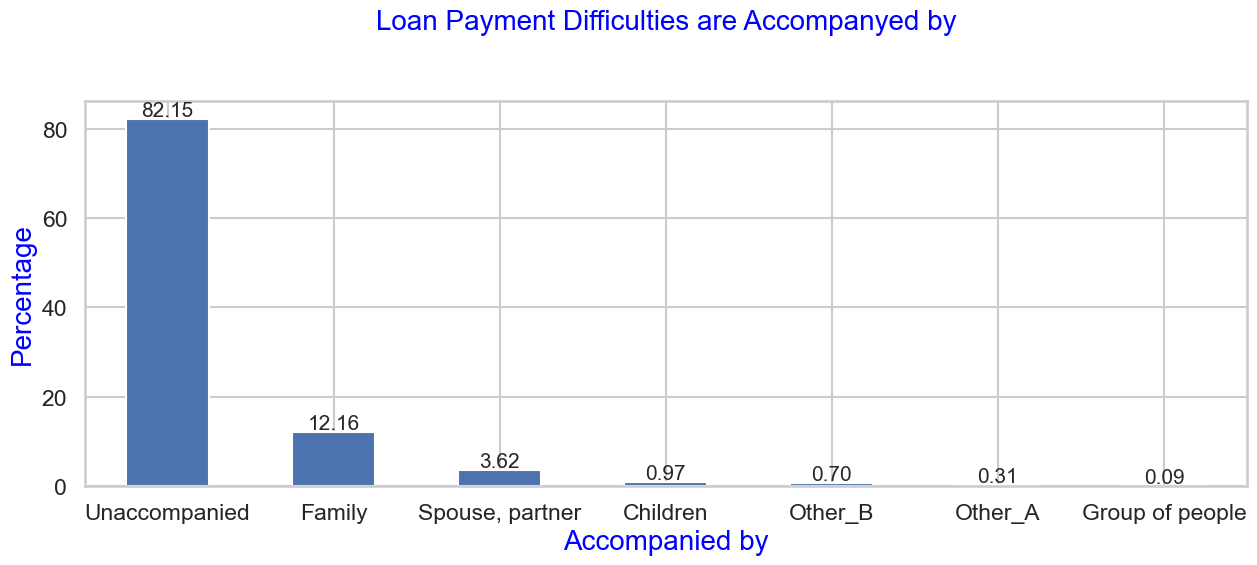

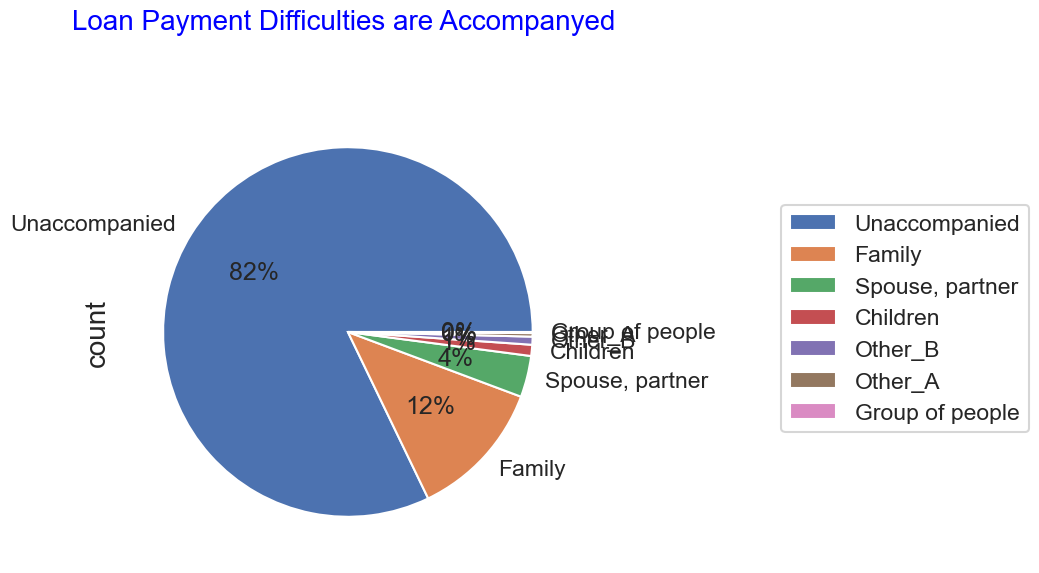

In [364]:
plt.figure(figsize = [15,5])
plots = (target_1["NAME_TYPE_SUITE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Loan Payment Difficulties are Accompanyed by\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Accompanied by",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)

# plot2
plt.figure(figsize = [15,6])
target_1["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Loan Payment Difficulties are Accompanyed \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show();


#####  no major changes were observed

# Bivariate Analysis

## Categorical vs Numerical variables

###  Analysis 1

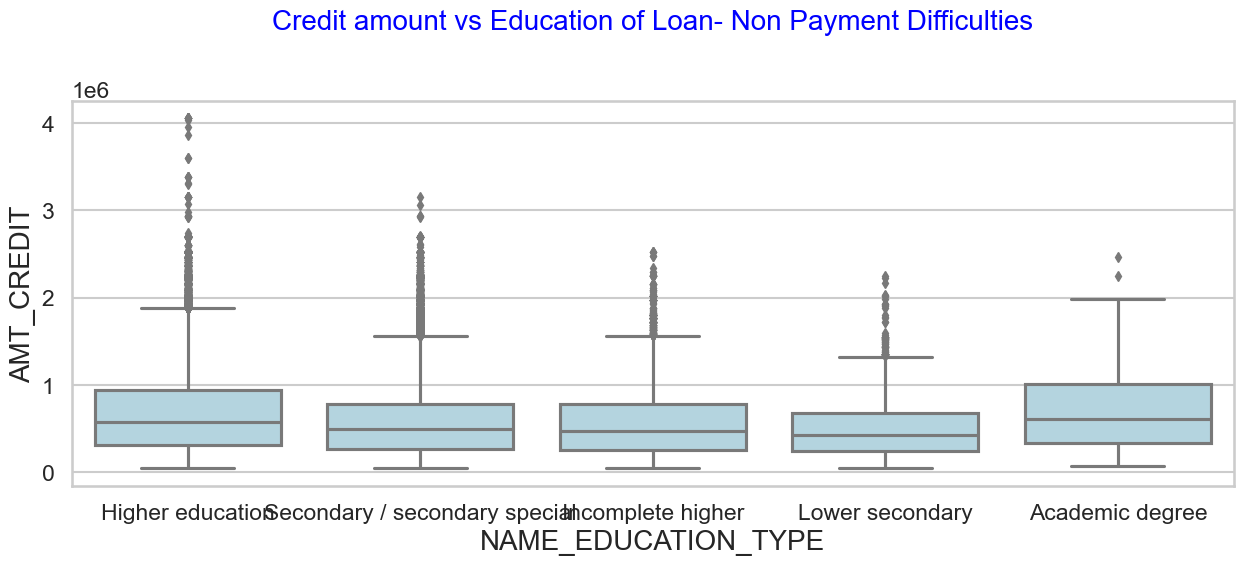

In [365]:
#  'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize=[15,5])
fig=sns.boxplot(data =target_0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='lightblue')
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
plt.show();

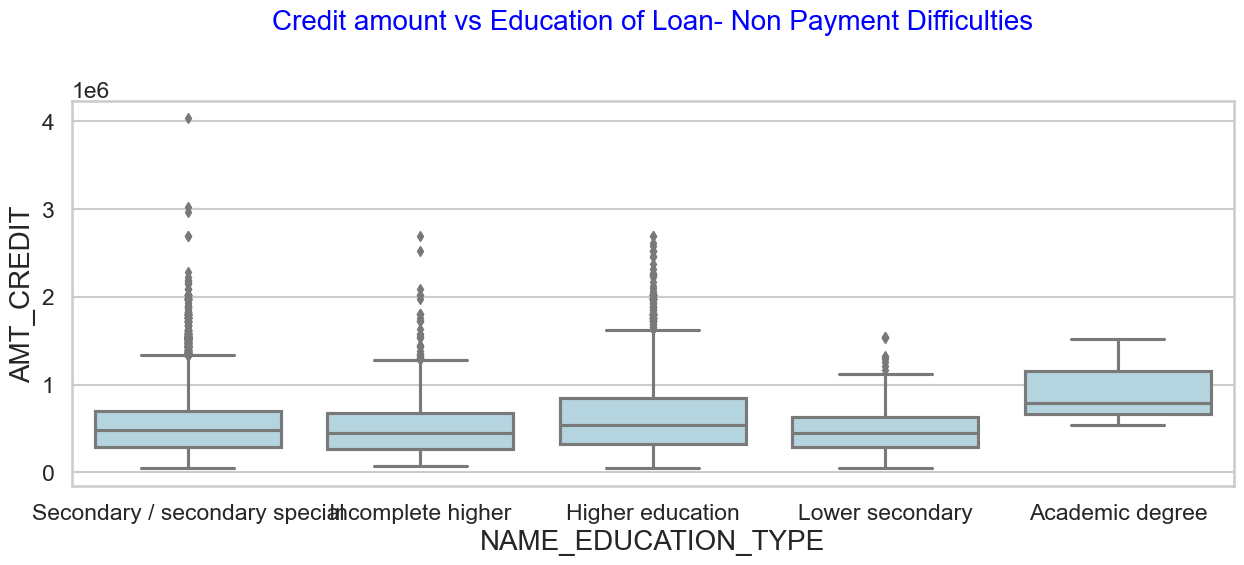

In [366]:
#  'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan  Payment Difficulties
plt.figure(figsize=[15,5])
fig=sns.boxplot(data =target_1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='lightblue')
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
plt.show();

#### The graphs for Loan Payment Difficulties and Loan Non-Payment Difficulties apperas to be similar. Most of the outliers are from Education type 'Higher education' and 'Secondary'.

# Bivarite Analysis of Categorical-categorical

In [195]:
# plot a bivarite plots
def biplot(feature):
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    app[feature].value_counts().plot.bar(color='blue')
    plt.title('count of'+feature,fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.xlabel(feature,fontdict={"fontsize":20,"fontweight":5,"color":"blue"})
    plt.ylabel('count',fontdict={"fontsize":20,"fontweight":5,"color":"blue"})
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    perc =(target_1[feature].value_counts()/app[feature].value_counts())
    perc.sort_values(ascending =False).plot.bar()
    plt.title("Percentage of loan payment difficulties \n with each category",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.xticks(rotation =90)
    plt.xlabel(feature,fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.ylabel("% 0f loan payment difficulties",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.show()

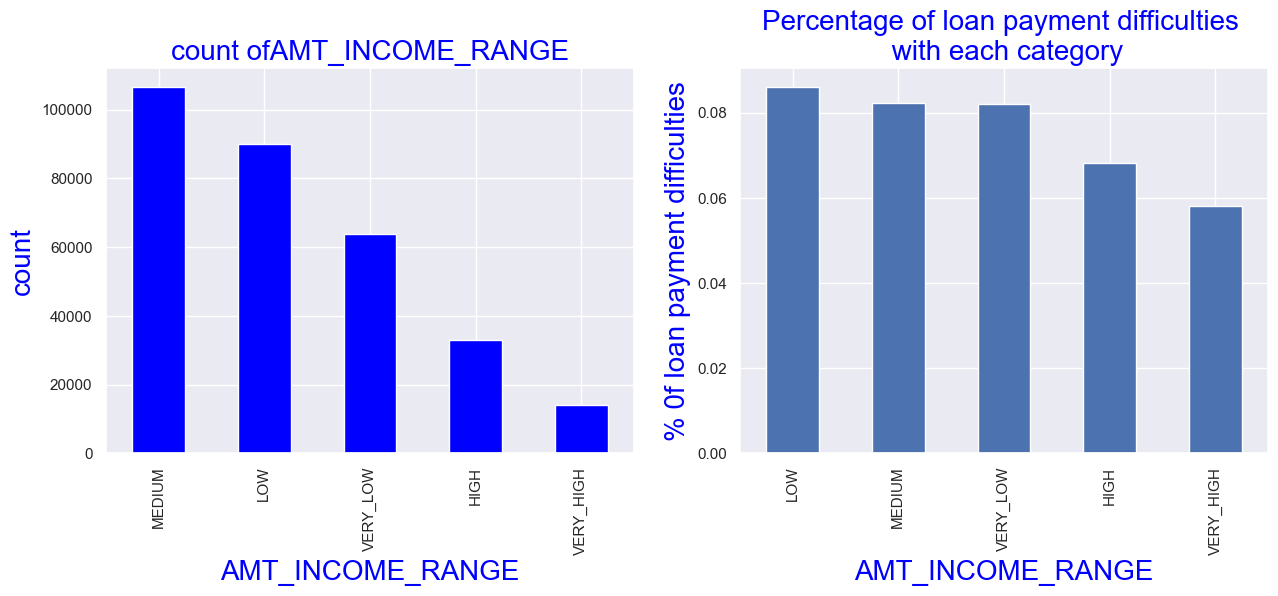

In [196]:
# Distribution of income range and the category with max loan-payment difficulties
biplot('AMT_INCOME_RANGE')

#### Based on the plot, we can say that clients in the 'LOW' Income range experience the highest percentage of Loan-Payment Difficulties.

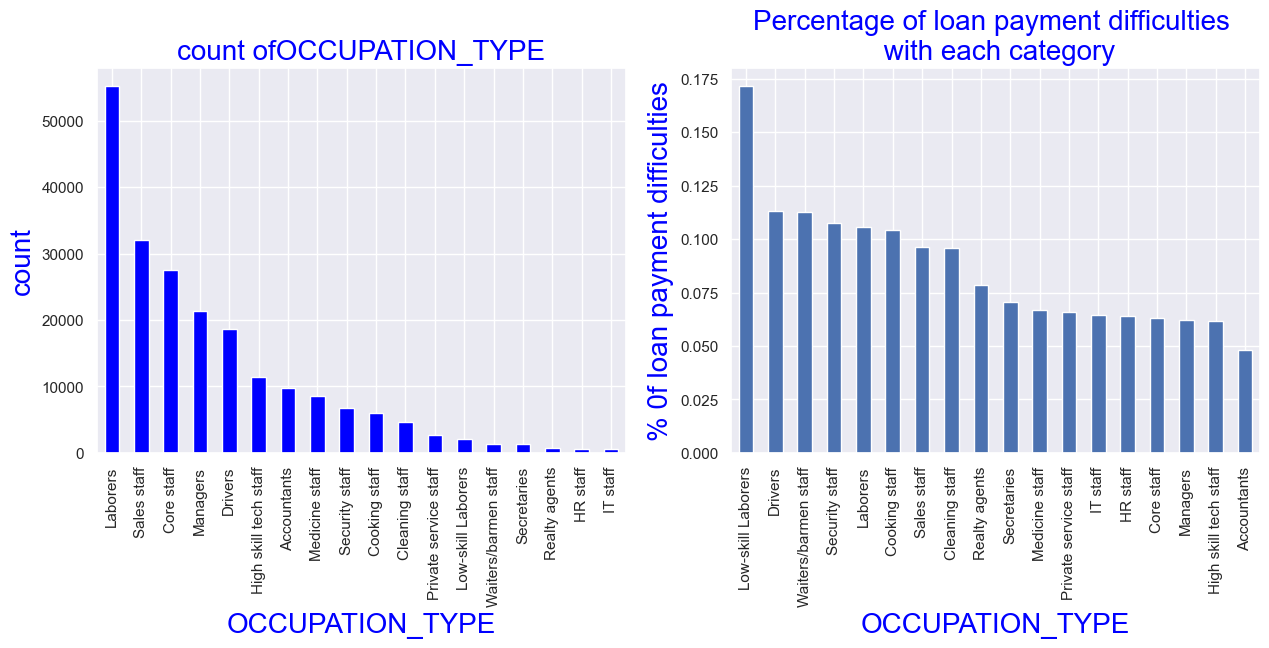

In [197]:
# Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties
biplot('OCCUPATION_TYPE')

##### Based on the plot, we can say that clients with the 'Lower skill Laborers' occupation type have the highest percentage of Loan-Payment Difficulties.








In [200]:
table=pd.pivot_table(app,values='TARGET',index=['CODE_GENDER','AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'],aggfunc=np.mean)
table

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          0.056068   
            LOW                      0.000000          0.049022   
            MEDIUM                   0.000000          0.050254   
            HIGH                     0.105263          0.041516   
            VERY_HIGH                0.076923          0.037289   
M           VERY_LOW                 0.000000          0.080411   
            LOW                      0.000000          0.073305   
            MEDIUM                   0.000000          0.070086   
            HIGH                     0.000000          0.055911   
            VERY_HIGH                0.000000          0.044080   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   0.086399         0.080193   
            LOW                        0.080075         0.113889   
            MEDIUM                     0.078431         0.096983   
            HIGH                       0.074313         0.038961   
            VERY_HIGH                  0.082251         0.066667   
M           VERY_LOW                   0.123967         0.125000   
            LOW                        0.097778         0.142857   
            MEDIUM                     0.095130         0.150515   
            HIGH                       0.074627         0.081633   
            VERY_HIGH                  0.077586         0.064516   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               0.076778  
            LOW                                    0.079523  
            MEDIUM                                 0.075692  
            HIGH                                   0.070736  
            VERY_HIGH                              0.065930  
M           VERY_LOW                               0.118066  
            LOW                                    0.123693  
            MEDIUM                                 0.113466  
            HIGH                                   0.093484  
            VERY_HIGH                              0.089939

#### Female clients with LOW income and LOWER SECONDARY education have the highest percentage of Loan-Payment Difficulties.

#### Male clients with MEDIUM income and LOWER SECONDARY education have the highest percentage of Loan-Payment Difficulties.

# Bivariate Analysis of Numerical vs Numerical Variables

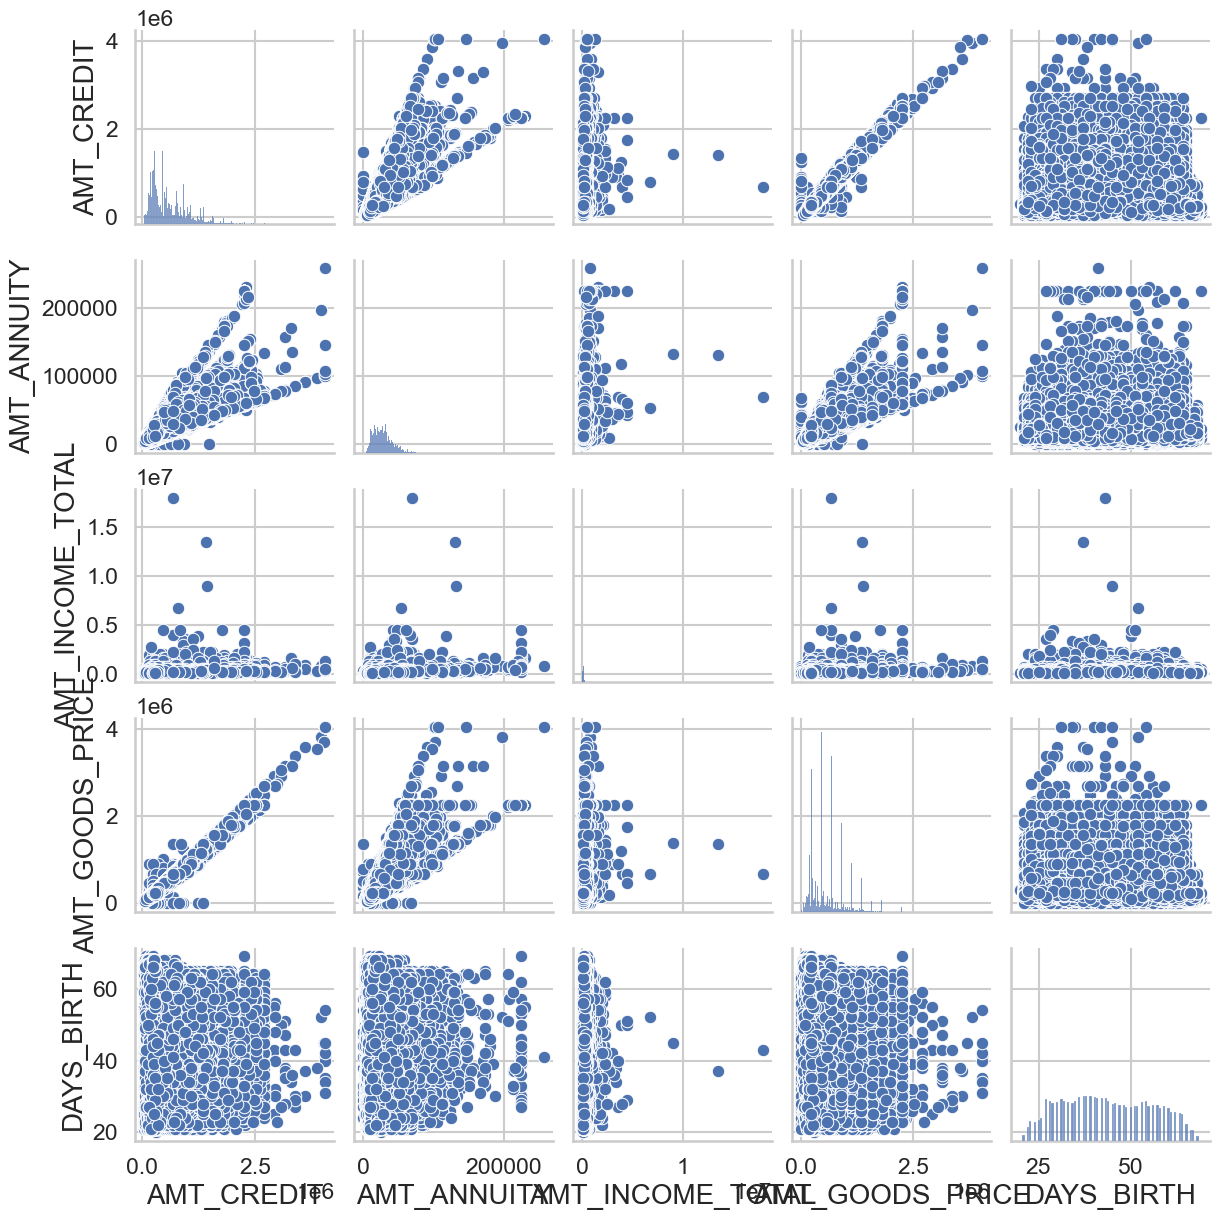

In [367]:
# pairplot for target0 loan-non payment difficults
pair=target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.show();

#### High correlation in the above plot of AMT_CREDIT and AMT_GOODS_PRICE

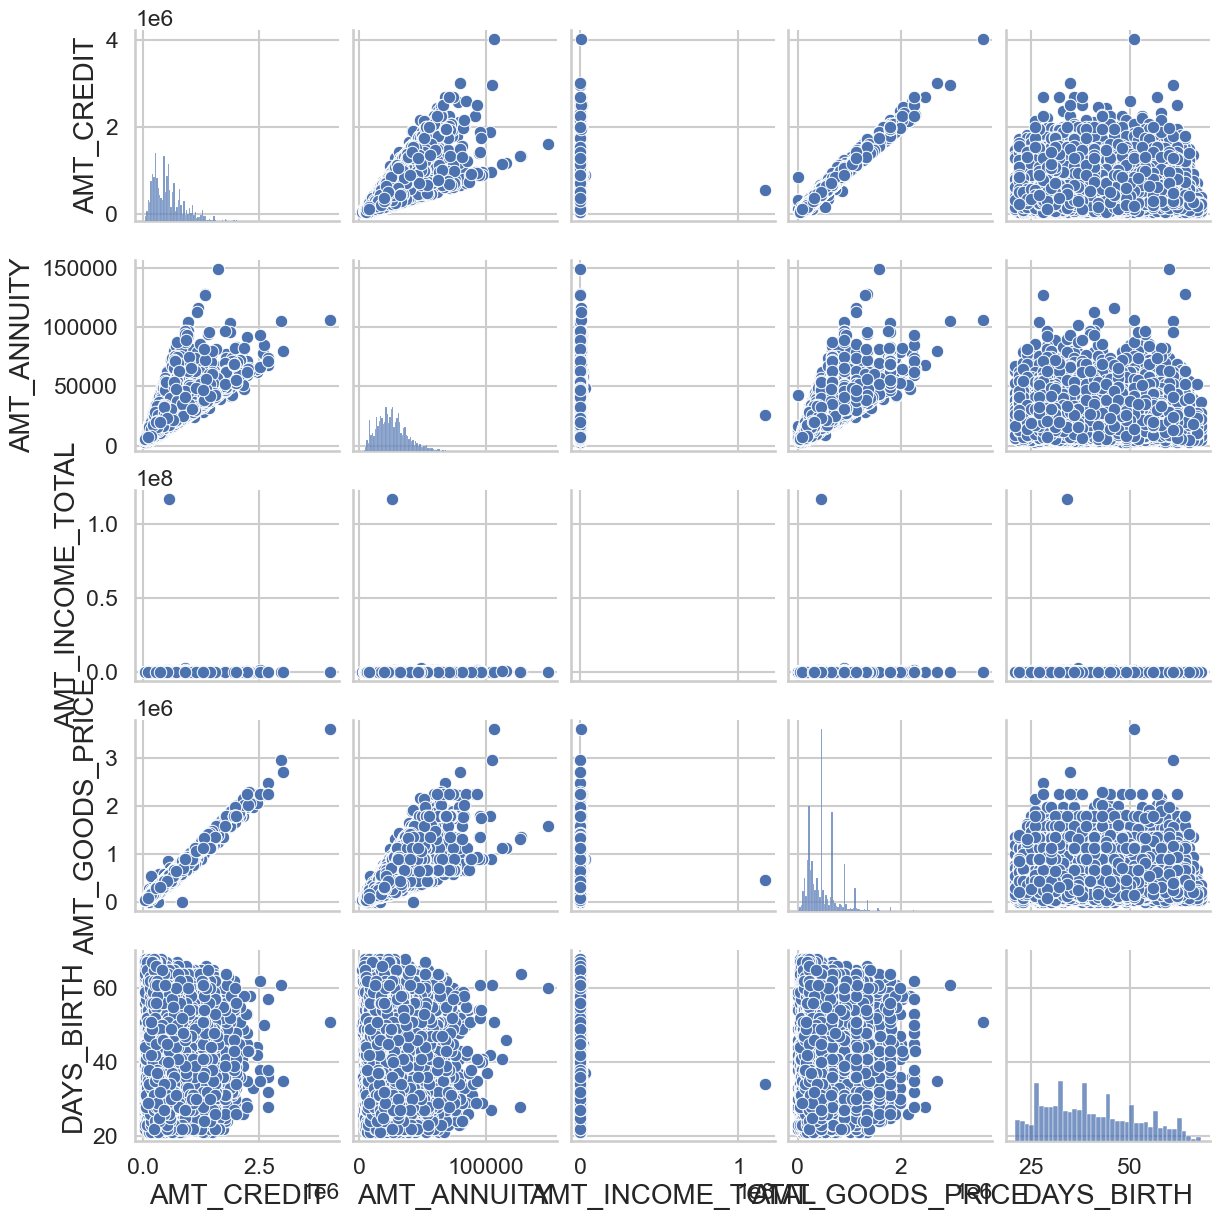

In [368]:
pair=target_1[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.show();

#### in this plot also high correlation in  AMT_CREDIT and AMT_GOODS_PRICE 

# Correlation

In [217]:
# correlation of all num columns
numeric_cols=target_0.select_dtypes(include=[np.number])
corr=numeric_cols.corr()
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.000716   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL                0.001739     NaN      0.027397   
AMT_CREDIT                     -0.000342     NaN      0.003081   
AMT_ANNUITY                     0.000068     NaN      0.020905   
AMT_GOODS_PRICE                -0.000205     NaN     -0.000525   
REGION_POPULATION_RELATIVE      0.000360     NaN     -0.024363   
DAYS_BIRTH                      0.001318     NaN     -0.336907   
DAYS_EMPLOYED                   0.001744     NaN     -0.245174   
DAYS_REGISTRATION               0.001475     NaN     -0.185792   
DAYS_ID_PUBLISH                 0.000077     NaN      0.028751   
OWN_CAR_AGE                     0.003019     NaN      0.008381   
FLAG_MOBIL                      0.002925     NaN      0.001080   
FLAG_EMP_PHONE                 -0.001717     NaN      0.244274   
FLAG_WORK_PHONE                -0.000854     NaN      0.055453   
FLAG_CONT_MOBILE                0.003319     NaN     -0.001201   
FLAG_PHONE                      0.001408     NaN     -0.029929   
FLAG_EMAIL                      0.000229     NaN      0.023460   
CNT_FAM_MEMBERS                -0.002790     NaN      0.878571   
REGION_RATING_CLIENT           -0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY    -0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START        -0.000115     NaN     -0.005244   
REG_REGION_NOT_LIVE_REGION      0.000104     NaN     -0.012342   
REG_REGION_NOT_WORK_REGION      0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION     0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY         -0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY         -0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY         0.000428     NaN      0.070988   
EXT_SOURCE_1                    0.000529     NaN     -0.142540   
EXT_SOURCE_2                    0.001589     NaN     -0.015455   
EXT_SOURCE_3                    0.000309     NaN     -0.041729   
APARTMENTS_AVG                  0.001324     NaN     -0.012354   
BASEMENTAREA_AVG               -0.002078     NaN     -0.008087   
YEARS_BEGINEXPLUATATION_AVG     0.001202     NaN      0.007298   
YEARS_BUILD_AVG                 0.005692     NaN      0.030897   
COMMONAREA_AVG                 -0.000629     NaN      0.001296   
ELEVATORS_AVG                   0.003999     NaN     -0.005960   
ENTRANCES_AVG                  -0.001974     NaN     -0.008049   
FLOORSMAX_AVG                   0.004096     NaN     -0.008307   
FLOORSMIN_AVG                   0.001317     NaN     -0.007308   
LANDAREA_AVG                    0.002822     NaN     -0.003903   
LIVINGAPARTMENTS_AVG            0.003524     NaN     -0.007534   
LIVINGAREA_AVG                  0.001894     NaN     -0.009157   
NONLIVINGAPARTMENTS_AVG        -0.001276     NaN      0.005628   
NONLIVINGAREA_AVG               0.003658     NaN      0.000882   
APARTMENTS_MODE                 0.001666     NaN     -0.011227   
BASEMENTAREA_MODE              -0.001394     NaN     -0.008572   
YEARS_BEGINEXPLUATATION_MODE    0.001442     NaN      0.006545   
YEARS_BUILD_MODE                0.004952     NaN      0.030247   
COMMONAREA_MODE                -0.000110     NaN      0.001450   
ELEVATORS_MODE                  0.004206     NaN     -0.005287   
ENTRANCES_MODE                 -0.001934     NaN     -0.006556   
FLOORSMAX_MODE                  0.003747     NaN     -0.008199   
FLOORSMIN_MODE                  0.000489     NaN     -0.006686   
LANDAREA_MODE                   0.002829     NaN     -0.003240   
LIVINGAPARTMENTS_MODE           0.004021     NaN     -0.006677   
LIVINGAREA_MODE                 0.002411     NaN     -0.008644   
NONLIVINGAPARTMENTS_MODE       -0.000464     NaN      0.005695   
NONLIVINGAREA_MODE              0.002419     NaN      0.001119   
APAR

In [219]:
# convert it to df
corrdf=corr.unstack().reset_index()
corrdf.head()

level_0           level_1         0
0  SK_ID_CURR        SK_ID_CURR  1.000000
1  SK_ID_CURR            TARGET       NaN
2  SK_ID_CURR      CNT_CHILDREN -0.000716
3  SK_ID_CURR  AMT_INCOME_TOTAL  0.001739
4  SK_ID_CURR        AMT_CREDIT -0.000342

In [220]:
# changing the name of columns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR     1.000000
1  SK_ID_CURR            TARGET          NaN
2  SK_ID_CURR      CNT_CHILDREN    -0.000716
3  SK_ID_CURR  AMT_INCOME_TOTAL     0.001739
4  SK_ID_CURR        AMT_CREDIT    -0.000342

In [221]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR     1.000000
2  SK_ID_CURR      CNT_CHILDREN    -0.000716
3  SK_ID_CURR  AMT_INCOME_TOTAL     0.001739
4  SK_ID_CURR        AMT_CREDIT    -0.000342
5  SK_ID_CURR       AMT_ANNUITY     0.000068

In [222]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR          1.0
2  SK_ID_CURR      CNT_CHILDREN         -0.0
3  SK_ID_CURR  AMT_INCOME_TOTAL          0.0
4  SK_ID_CURR        AMT_CREDIT         -0.0
5  SK_ID_CURR       AMT_ANNUITY          0.0

In [223]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR          1.0
2  SK_ID_CURR      CNT_CHILDREN          0.0
3  SK_ID_CURR  AMT_INCOME_TOTAL          0.0
4  SK_ID_CURR        AMT_CREDIT          0.0
5  SK_ID_CURR       AMT_ANNUITY          0.0

In [224]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


VAR1                         VAR2  Correlation
0                      SK_ID_CURR                   SK_ID_CURR          1.0
324              AMT_INCOME_TOTAL             AMT_INCOME_TOTAL          1.0
3484               APARTMENTS_AVG              APARTMENTS_MEDI          1.0
3564             BASEMENTAREA_AVG             BASEMENTAREA_AVG          1.0
3672  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_AVG          1.0
3780              YEARS_BUILD_AVG              YEARS_BUILD_AVG          1.0
3808              YEARS_BUILD_AVG             YEARS_BUILD_MEDI          1.0
3888               COMMONAREA_AVG               COMMONAREA_AVG          1.0
3916               COMMONAREA_AVG              COMMONAREA_MEDI          1.0
3996                ELEVATORS_AVG                ELEVATORS_AVG          1.0

#### Social circle for 30 days and 60 days are the most correlated.
#### Goods price and Loan amount credit are highly correlated.
#### Goods price and amount annuity have significant correlation, ranking fourth in the list.







In [228]:
#For target_1 dataframe we perform the same operations to find correlation
numeric_cols=target_1.select_dtypes(include=[np.number])
corr=numeric_cols.corr()
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.005144   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.005144     NaN      1.000000   
AMT_INCOME_TOTAL               -0.010165     NaN      0.004796   
AMT_CREDIT                     -0.001290     NaN     -0.001675   
AMT_ANNUITY                    -0.007578     NaN      0.031257   
AMT_GOODS_PRICE                -0.001816     NaN     -0.008112   
REGION_POPULATION_RELATIVE      0.006301     NaN     -0.031975   
DAYS_BIRTH                      0.001160     NaN     -0.259222   
DAYS_EMPLOYED                  -0.005161     NaN     -0.192864   
DAYS_REGISTRATION              -0.006342     NaN     -0.149154   
DAYS_ID_PUBLISH                 0.002539     NaN      0.032299   
OWN_CAR_AGE                    -0.011687     NaN      0.006231   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                  0.005248     NaN      0.192469   
FLAG_WORK_PHONE                 0.004970     NaN      0.051712   
FLAG_CONT_MOBILE               -0.003039     NaN      0.003592   
FLAG_PHONE                      0.018246     NaN     -0.024306   
FLAG_EMAIL                      0.000831     NaN      0.013902   
CNT_FAM_MEMBERS                -0.003816     NaN      0.885484   
REGION_RATING_CLIENT           -0.005936     NaN      0.040680   
REGION_RATING_CLIENT_W_CITY    -0.004135     NaN      0.043185   
HOUR_APPR_PROCESS_START         0.005004     NaN     -0.023899   
REG_REGION_NOT_LIVE_REGION     -0.004249     NaN     -0.024322   
REG_REGION_NOT_WORK_REGION      0.004120     NaN     -0.020793   
LIVE_REGION_NOT_WORK_REGION     0.004303     NaN     -0.012073   
REG_CITY_NOT_LIVE_CITY          0.008328     NaN     -0.001174   
REG_CITY_NOT_WORK_CITY          0.000787     NaN      0.046115   
LIVE_CITY_NOT_WORK_CITY        -0.002929     NaN      0.053515   
EXT_SOURCE_1                   -0.002236     NaN     -0.091060   
EXT_SOURCE_2                    0.006452     NaN     -0.012260   
EXT_SOURCE_3                   -0.008178     NaN     -0.020268   
APARTMENTS_AVG                  0.004968     NaN     -0.019326   
BASEMENTAREA_AVG               -0.002181     NaN     -0.009617   
YEARS_BEGINEXPLUATATION_AVG     0.005597     NaN      0.004346   
YEARS_BUILD_AVG                 0.008349     NaN      0.024057   
COMMONAREA_AVG                 -0.014715     NaN     -0.013829   
ELEVATORS_AVG                   0.017717     NaN     -0.015549   
ENTRANCES_AVG                  -0.015246     NaN     -0.008382   
FLOORSMAX_AVG                   0.015976     NaN     -0.020326   
FLOORSMIN_AVG                   0.028943     NaN     -0.023734   
LANDAREA_AVG                   -0.016790     NaN      0.008967   
LIVINGAPARTMENTS_AVG           -0.003292     NaN     -0.020043   
LIVINGAREA_AVG                  0.000341     NaN     -0.016359   
NONLIVINGAPARTMENTS_AVG        -0.020718     NaN     -0.016622   
NONLIVINGAREA_AVG              -0.006369     NaN     -0.009447   
APARTMENTS_MODE                 0.006268     NaN     -0.018727   
BASEMENTAREA_MODE              -0.001865     NaN     -0.003871   
YEARS_BEGINEXPLUATATION_MODE    0.007172     NaN      0.003981   
YEARS_BUILD_MODE                0.008860     NaN      0.023772   
COMMONAREA_MODE                -0.015841     NaN     -0.011550   
ELEVATORS_MODE                  0.017034     NaN     -0.015435   
ENTRANCES_MODE                 -0.015290     NaN     -0.007695   
FLOORSMAX_MODE                  0.013810     NaN     -0.019678   
FLOORSMIN_MODE                  0.025368     NaN     -0.021928   
LANDAREA_MODE                  -0.015779     NaN      0.012988   
LIVINGAPARTMENTS_MODE          -0.003133     NaN     -0.021788   
LIVINGAREA_MODE                -0.001218     NaN     -0.015002   
NONLIVINGAPARTMENTS_MODE       -0.021610     NaN     -0.016707   
NONLIVINGAREA_MODE             -0.005693     NaN     -0.009900   
APAR

In [229]:
# convert it to df
corrdf=corr.unstack().reset_index()
corrdf.head()

level_0           level_1         0
0  SK_ID_CURR        SK_ID_CURR  1.000000
1  SK_ID_CURR            TARGET       NaN
2  SK_ID_CURR      CNT_CHILDREN -0.005144
3  SK_ID_CURR  AMT_INCOME_TOTAL -0.010165
4  SK_ID_CURR        AMT_CREDIT -0.001290

In [230]:
# changing the name of columns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR     1.000000
1  SK_ID_CURR            TARGET          NaN
2  SK_ID_CURR      CNT_CHILDREN    -0.005144
3  SK_ID_CURR  AMT_INCOME_TOTAL    -0.010165
4  SK_ID_CURR        AMT_CREDIT    -0.001290

In [231]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR     1.000000
2  SK_ID_CURR      CNT_CHILDREN    -0.005144
3  SK_ID_CURR  AMT_INCOME_TOTAL    -0.010165
4  SK_ID_CURR        AMT_CREDIT    -0.001290
5  SK_ID_CURR       AMT_ANNUITY    -0.007578

In [232]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR         1.00
2  SK_ID_CURR      CNT_CHILDREN        -0.01
3  SK_ID_CURR  AMT_INCOME_TOTAL        -0.01
4  SK_ID_CURR        AMT_CREDIT        -0.00
5  SK_ID_CURR       AMT_ANNUITY        -0.01

In [233]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR         1.00
2  SK_ID_CURR      CNT_CHILDREN         0.01
3  SK_ID_CURR  AMT_INCOME_TOTAL         0.01
4  SK_ID_CURR        AMT_CREDIT         0.00
5  SK_ID_CURR       AMT_ANNUITY         0.01

In [234]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


VAR1                          VAR2  Correlation
0                      SK_ID_CURR                    SK_ID_CURR          1.0
4536         LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_AVG          1.0
3672  YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_AVG          1.0
3700  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI          1.0
3780              YEARS_BUILD_AVG               YEARS_BUILD_AVG          1.0
3808              YEARS_BUILD_AVG              YEARS_BUILD_MEDI          1.0
3888               COMMONAREA_AVG                COMMONAREA_AVG          1.0
3916               COMMONAREA_AVG               COMMONAREA_MEDI          1.0
3996                ELEVATORS_AVG                 ELEVATORS_AVG          1.0
4104                ENTRANCES_AVG                 ENTRANCES_AVG          1.0

##### For the target_1 dataframe, we observe that Goods price and loan credit amount are the most correlated, followed by social circle observations for different days. Thus, the variables that are highly correlated in both target_0 and target_1 dataframes are the same, with slightly varying correlation values.

# End of the 'application.csv'

# Now we will analyze the 'previous_application.csv' data set

# Read the csv file

In [235]:
prv=pd.read_csv('previous_application.csv')

In [236]:
prv.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [290]:
# Removing the column values of 'XNA' and 'XAP'

prv=prv.drop(prv[prv['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prv=prv.drop(prv[prv['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prv=prv.drop(prv[prv['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [292]:
#Merge the previous application with the current application data file
merge_df=pd.merge(left=app,right=prv,how='inner',on='SK_ID_CURR')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0           90000.0      180000.0   
1               Y             0          292500.0      665892.0   
2               N             1          360000.0      733315.5   
3               Y             0          180000.0      540000.0   
4               Y             0          180000.0      540000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0         9000.0           180000.0     Unaccompanied               Working   
1        24592.5           477000.0     Unaccompanied  Commercial associate   
2        39069.0           679500.0     Unaccompanied  Commercial associate   
3        27000.0           540000.0     Unaccompanied               Working   
4        27000.0           540000.0     Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755          28           1010             4799.0   
1                    0.025164          41           2668             5266.0   
2                    0.015221          32           2060             3557.0   
3                    0.025164          44           1761             8236.0   
4                    0.025164          44           1761             8236.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             3015          NaN           1               1                0   
1             3787          NaN           1               1                0   
2             3557          3.0           1               1                0   
3             4292          3.0           1               1                0   
4             4292          3.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0        Laborers              1.0   
1                 1           0           1             NaN              2.0   
2                 1           0           0         Drivers              3.0   
3                 1           0           0        Managers              2.0   
4                 1           0           0        Managers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                      TUESDAY                         16   
1                    WEDNESDAY                         13   
2                     THURSDAY                         10   
3                      TUESDAY                          8   
4                      TUESDAY                          8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0    

In [293]:
# Renaming the column names after merging

new_df = merge_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0           90000.0      180000.0   
1               Y             0          292500.0      665892.0   
2               N             1          360000.0      733315.5   
3               Y             0          180000.0      540000.0   
4               Y             0          180000.0      540000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0         9000.0           180000.0     Unaccompanied               Working   
1        24592.5           477000.0     Unaccompanied  Commercial associate   
2        39069.0           679500.0     Unaccompanied  Commercial associate   
3        27000.0           540000.0     Unaccompanied               Working   
4        27000.0           540000.0     Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755          28           1010             4799.0   
1                    0.025164          41           2668             5266.0   
2                    0.015221          32           2060             3557.0   
3                    0.025164          44           1761             8236.0   
4                    0.025164          44           1761             8236.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             3015          NaN           1               1                0   
1             3787          NaN           1               1                0   
2             3557          3.0           1               1                0   
3             4292          3.0           1               1                0   
4             4292          3.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0        Laborers              1.0   
1                 1           0           1             NaN              2.0   
2                 1           0           0         Drivers              3.0   
3                 1           0           0        Managers              2.0   
4                 1           0           0        Managers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                      TUESDAY                         16   
1                    WEDNESDAY                         13   
2                     THURSDAY                         10   
3                      TUESDAY                          8   
4                      TUESDAY                          8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0    

In [297]:
# Removing unwanted columns for analysis

new_df.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

               
new_df.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0      Revolving loans           M            N               Y   
1       0           Cash loans           F            N               Y   
2       0           Cash loans           M            Y               N   
3       0      Revolving loans           M            Y               Y   
4       0      Revolving loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0             0           90000.0      180000.0         9000.0   
1             0          292500.0      665892.0        24592.5   
2             1          360000.0      733315.5        39069.0   
3             0          180000.0      540000.0        27000.0   
4             0          180000.0      540000.0        27000.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0           180000.0     Unaccompanied               Working   
1           477000.0     Unaccompanied  Commercial associate   
2           679500.0     Unaccompanied  Commercial associate   
3           540000.0     Unaccompanied               Working   
4           540000.0     Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755          28           1010             4799.0   
1                    0.025164          41           2668             5266.0   
2                    0.015221          32           2060             3557.0   
3                    0.025164          44           1761             8236.0   
4                    0.025164          44           1761             8236.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             3015          NaN           1               1                0   
1             3787          NaN           1               1                0   
2             3557          3.0           1               1                0   
3             4292          3.0           1               1                0   
4             4292          3.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0        Laborers              1.0   
1                 1           0           1             NaN              2.0   
2                 1           0           0         Drivers              3.0   
3                 1           0           0        Managers              2.0   
4                 1           0           0        Managers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                      TUESDAY                         16   
1                    WEDNESDAY                         13   
2                     THURSDAY                         10   
3                      TUESDAY                          8   
4                      TUESDAY                          8   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.297914      0.502779           NaN   
1  Business Entity Type 

In [316]:
train_0 = app.loc[app['TARGET'] == 0]
train_1 = app.loc[app['TARGET'] == 1]

In [318]:
prv.columns = prv.columns.str.strip()
if 'TARGET' in prv.columns:
    ptrain_0 = prv.loc[prv['TARGET'] == 0]
    ptrain_1 = prv.loc[prv['TARGET'] == 1]

# Univariate Analysis

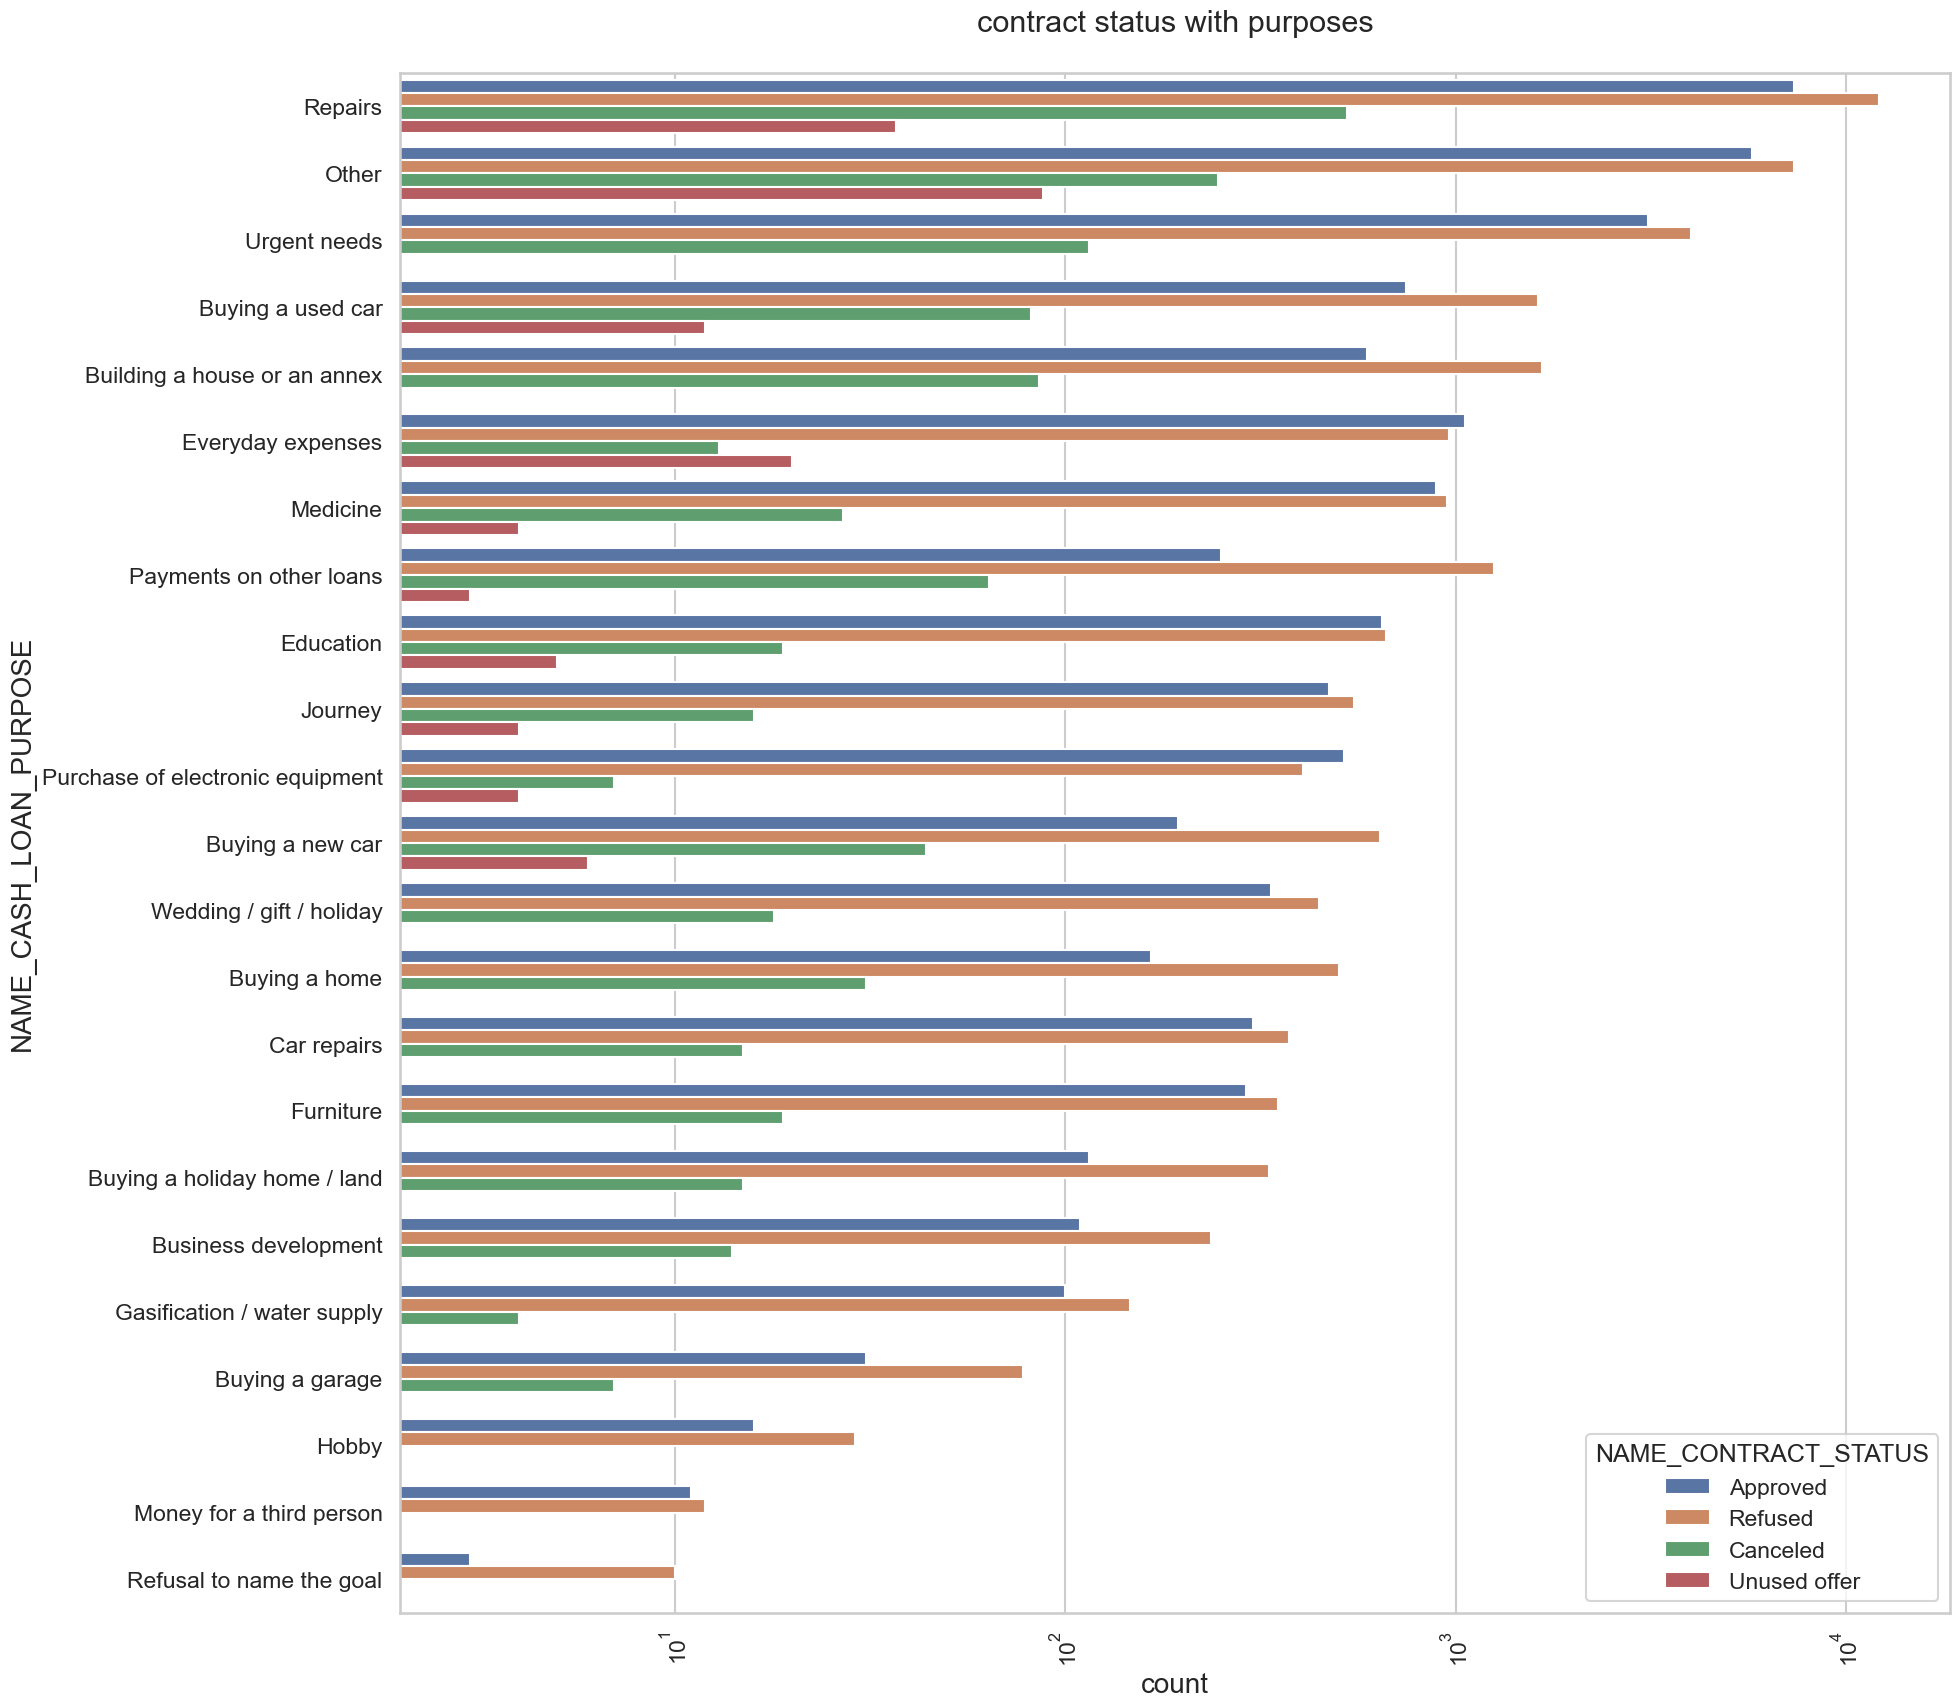

In [376]:
# contract status in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')
plt.show();

#### The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
#### Income type of state servants have a significant amount of credit applied
#### Money for third person or a Hobby is having less credits applied for.

# Bivariate Analysis

In [374]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(15,10))

    ax1 = plt.subplot(221)
    app[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)

    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')

    fig.tight_layout() 

    plt.show()
       

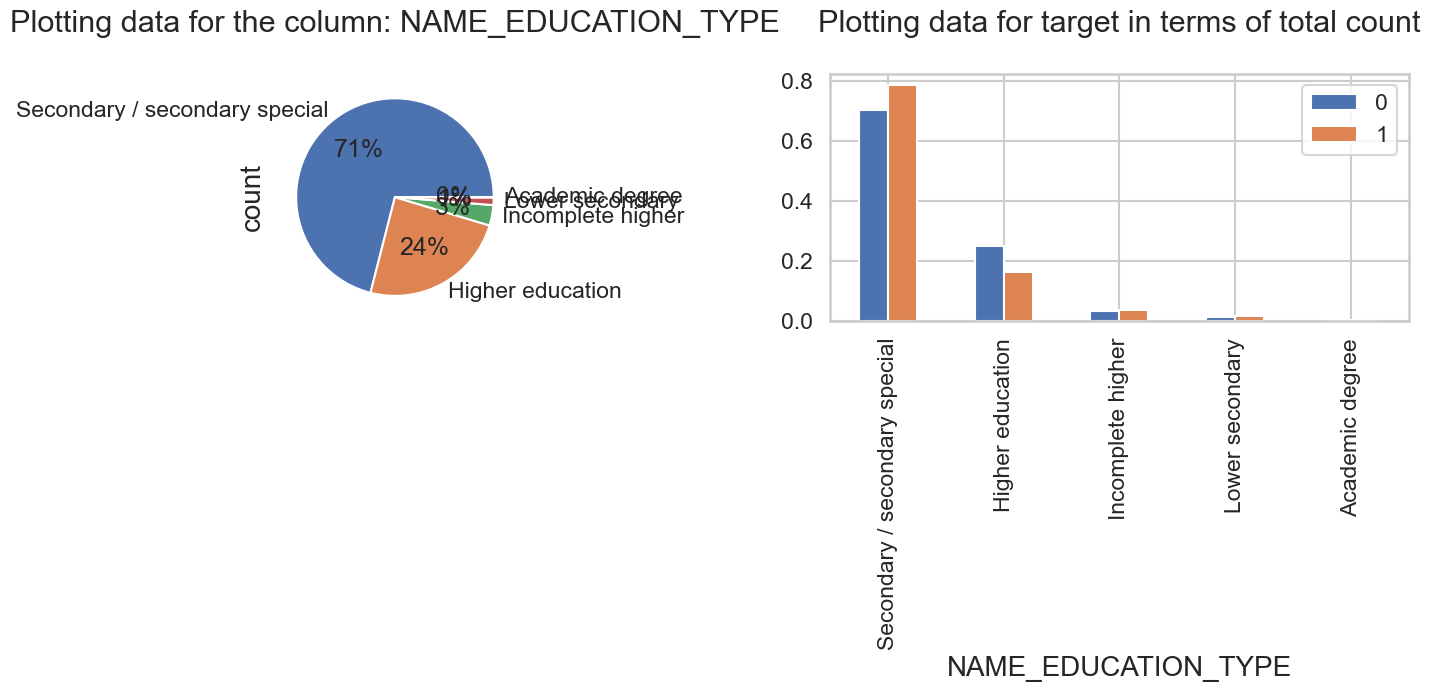

In [375]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')   

#### In both cases the 'Secondary/secondary special'  has values up to 71%, compared with the rest of the values

# Complete of the Both df analysis

# CONCLUSION

####  Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
#### Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
#### Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
#### Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.
